In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
sns.set_palette("colorblind")

# Load the dataset
df = pd.read_csv('DFC_reduced.csv')

# Display the shape and the first rows of the dataset
print(f"Dataset dimensions: {df.shape}")
print("\nFirst few rows:")
display(df.head())
# display and describe the data types and certain statistical measures for every columns present.
print("\nColumns in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())


Dataset dimensions: (2500, 46)

First few rows:


,CMS Certification Number (CCN),Network,Facility Name,Five Star,Address Line 1,City/Town,State,ZIP Code,County/Parish,Profit or Non-Profit,...,Fistula Rate (Facility),Healthcare worker COVID-19 vaccination adherence percentage,Number of Dialysis Patients with Hgb data,Number of patient-months in hypercalcemia summary,Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL),Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL,Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL,Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL,Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL,Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL
0,453519,14,Parkland Peritoneal Dialysis Clinic,NaN,4201 Brook Spring Drive,Dallas,TX,75244,Dallas,Non-profit,...,NaN,NaN,0.0,207.0,0.0,4.0,23.0,19.0,24.0,31.0
1,222562,1,FMC of Newburyport,4.0,260 Merrimac Street,NEWBURYPORT,MA,1950,Essex,Profit,...,65.9,11.0,31.0,660.0,0.0,9.0,23.0,33.0,20.0,15.0
2,522608,11,DaVita Lake Delton Dialysis,2.0,14 COUNTY ROAD P,WISCONSIN DELLS,WI,53965,Sauk,Profit,...,69.4,0.0,18.0,374.0,1.0,5.0,19.0,25.0,29.0,22.0
3,452829,14,IRC-San Antonio Medical Drive,2.0,3939 MEDICAL DRIVE,SAN ANTONIO,TX,78229,Bexar,Profit,...,55.4,94.0,8.0,268.0,1.0,7.0,26.0,38.0,16.0,14.0
4,552669,17,DaVita Davies Dialysis,3.0,"45 CASTRO STREET, SOUTH TOWER 2ND FLOOR",SAN FRANCISCO,CA,94114,San Francisco,Profit,...,69.7,4.0,24.0,554.0,3.0,9.0,21.0,29.0,23.0,18.0



Columns in the dataset:
1. CMS Certification Number (CCN)
2. Network
3. Facility Name
4. Five Star
5. Address Line 1
6. City/Town
7. State
8. ZIP Code
9. County/Parish
10. Profit or Non-Profit
11. Chain Owned
12. Chain Organization
13. Late Shift
14. # of Dialysis Stations
15. Offers in-center hemodialysis
16. Offers peritoneal dialysis
17. Offers home hemodialysis training
18. Patient Survival Category Text
19. Number of Patients included in survival summary
20. Mortality Rate (Facility)
21. Patient hospitalization category text
22. Hospitalization Rate (Facility)
23. Patient Hospital Readmission Category
24. Number of hospitalizations included in hospital readmission summary
25. Readmission Rate (Facility)
26. Patient Transfusion category text
27. Transfusion Rate (Facility)
28. Number of patients in this facility for SWR
29. Standardized First Kidney Transplant Waitlist Ratio
30. PPPW category text
31. Number of patients for PPPW
32. Percentage of Prevalent Patients Waitlisted
33. 


Columns with missing values:


,Missing Values,Percentage (%)
Standardized First Kidney Transplant Waitlist Ratio,1186,47.44
Transfusion Rate (Facility),883,35.32
Standard Infection Ratio,363,14.52
Healthcare worker COVID-19 vaccination adherence percentage,334,13.36
Standardized ED visits within 30 days of hospital discharge ratio (Facility),224,8.96
Standardized ED visits ratio (Facility),218,8.72
Five Star,185,7.40
Fistula Rate (Facility),180,7.20
Readmission Rate (Facility),173,6.92
Mortality Rate (Facility),125,5.00


<Figure size 1600x800 with 0 Axes>

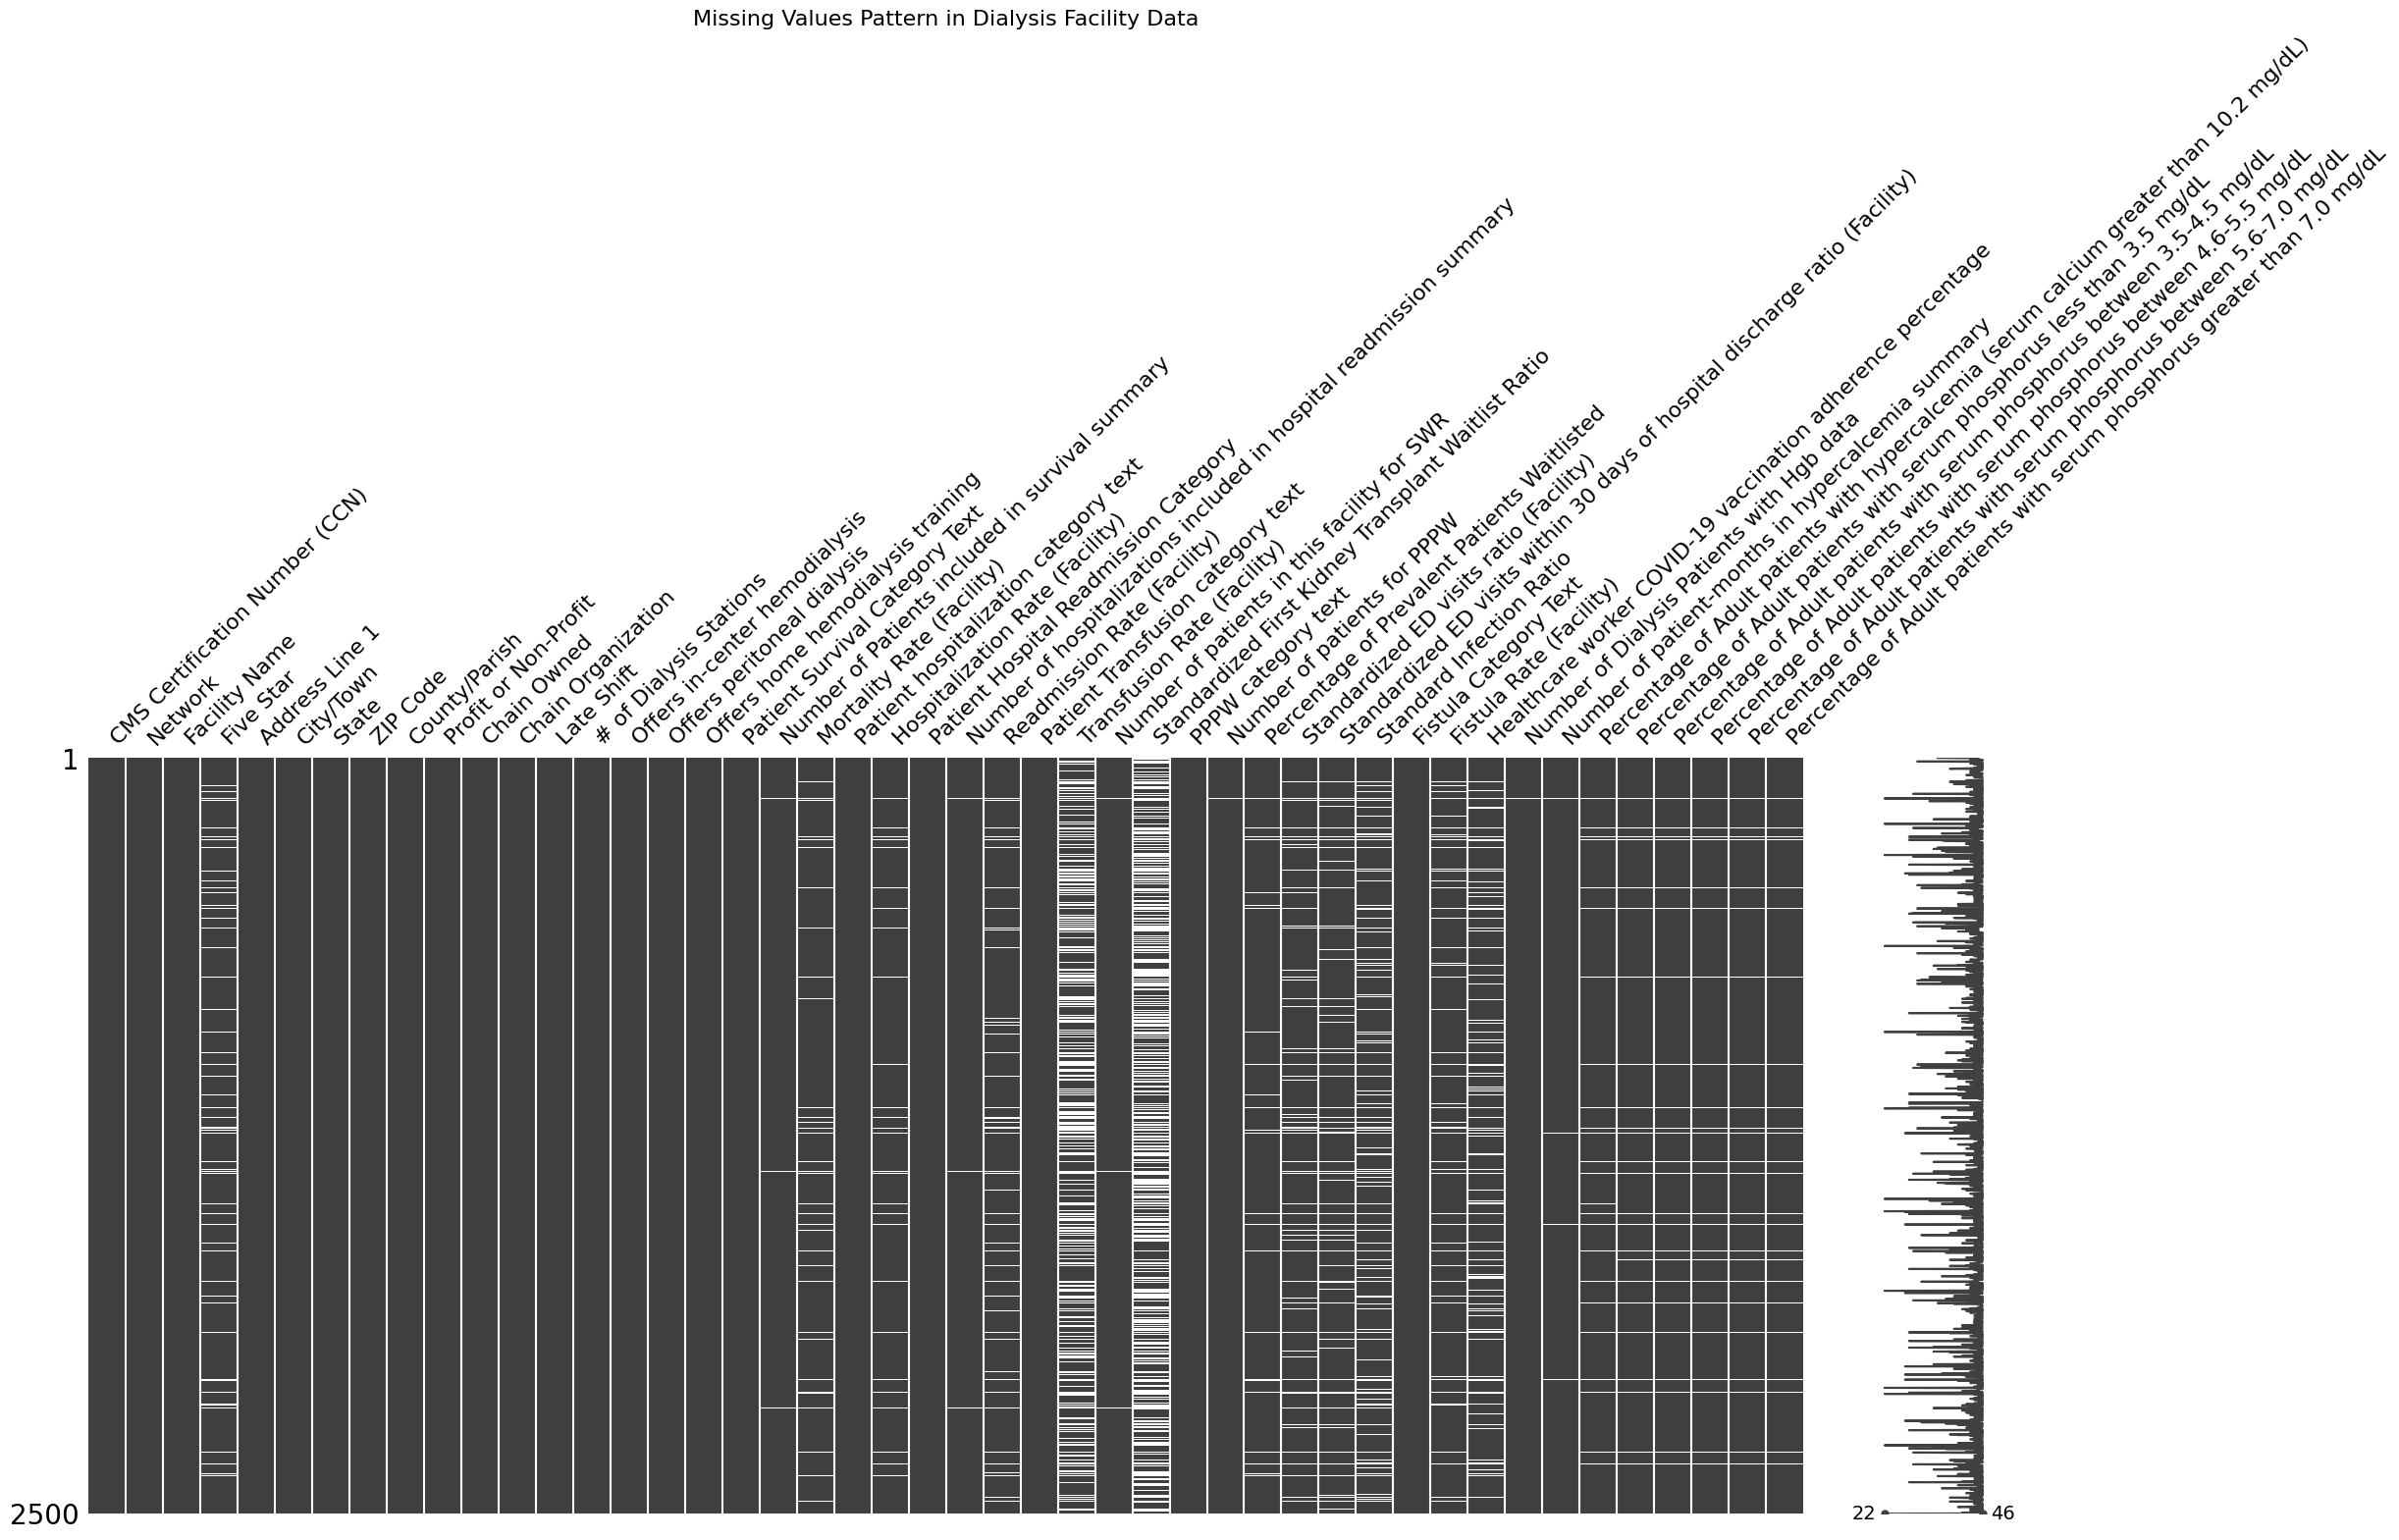

In [2]:
# Check missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing value information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Display only columns with missing values
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Values', ascending=False)
print("\nColumns with missing values:")
display(missing_info)

# Visualize missing values pattern
plt.figure(figsize=(16, 8))
msno.matrix(df)
plt.title('Missing Values Pattern in Dialysis Facility Data', fontsize=16)
plt.tight_layout()
plt.savefig('missing_values_pattern.png', dpi=300, bbox_inches='tight')
plt.show()




In [3]:
# Making a copy of the dataframe
df_imputed = df.copy()

# Separating numerical and categorical columns
numeric_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_imputed.select_dtypes(include=['object']).columns.tolist()

print(f"Number of numerical columns: {len(numeric_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")


# Metrics where mean or median are needed
clinical_metrics = [
    'Mortality Rate (Facility)', 'Hospitalization Rate (Facility)',
    'Readmission Rate (Facility)', 'Transfusion Rate (Facility)',
    'Standardized First Kidney Transplant Waitlist Ratio',
    'Percentage of Prevalent Patients Waitlisted', 'Standardized ED visits ratio (Facility)',
    'Standardized ED visits within 30 days of hospital discharge ratio (Facility)',
    'Standard Infection Ratio', 'Fistula Rate (Facility)',
    'Number of Patients included in survival summary',
    'Number of patients for PPPW',
    'Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)',
    'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL',
    'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL',
    'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL',
    'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL',
    'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL',
    'Number of patient-months in hypercalcemia summary',
    'Number of hospitalizations included in hospital readmission summary',
    'Number of patients in this facility for SWR',
    'Number of Dialysis Patients with Hgb data'

    ]


# Columns imputed by mode or value-specific imputation
facility_metrics = [
    '# of Dialysis Stations',
    'Healthcare worker COVID-19 vaccination adherence percentage']


# Columns not to be impute due to being specific identifiers
do_not_impute = [
    'CMS Certification Number (CCN)', 'Network', 'Facility Name',
    'Five Star Date', 'Address Line 1', 'City/Town', 'State','Five Star','ZIP Code',
    'County/Parish', 'Chain Organization', 'Certification Date']



Number of numerical columns: 28
Number of categorical columns: 18


In [4]:
#  Simple imputation for numerical variables
simple_imputer_mean = SimpleImputer(strategy='mean')
simple_imputer_mode = SimpleImputer(strategy='most_frequent')

#  KNN imputation for numerical variables
knn_imputer = KNNImputer(n_neighbors=5)

#  Mode imputation for categorical variables
cat_imputer = SimpleImputer(strategy='most_frequent')

df_imputed_simple = df_imputed.copy()
df_imputed_knn = df_imputed.copy()

# Apply imputation to clinical metrics
clinical_metrics_present = [col for col in clinical_metrics if col in df_imputed.columns]

# Simple mean imputation
for col in clinical_metrics_present:
    if df_imputed[col].isnull().sum() > 0:
        col_data = df_imputed[col].values.reshape(-1, 1)
        df_imputed_simple[col] = simple_imputer_mean.fit_transform(col_data)

# KNN imputation for clinical metrics
if clinical_metrics_present:
    clinical_data = df_imputed[clinical_metrics_present].copy()
    imputed_clinical_data = knn_imputer.fit_transform(clinical_data)
    df_imputed_knn[clinical_metrics_present] = imputed_clinical_data

# Impute facility metrics using mode
facility_metrics_present = [col for col in facility_metrics if col in df_imputed.columns]
for col in facility_metrics_present:
    if df_imputed[col].isnull().sum() > 0:
        col_data = df_imputed[col].values.reshape(-1, 1)
        df_imputed_simple[col] = simple_imputer_mode.fit_transform(col_data)
        df_imputed_knn[col] = simple_imputer_mode.fit_transform(col_data)

# Impute categorical variables using mode
for col in categorical_cols:
    if col not in do_not_impute and df_imputed[col].isnull().sum() > 0:
        col_data = df_imputed[col].values.reshape(-1, 1)
        imputed_values = cat_imputer.fit_transform(col_data)
        df_imputed_simple[col] = imputed_values
        df_imputed_knn[col] = imputed_values





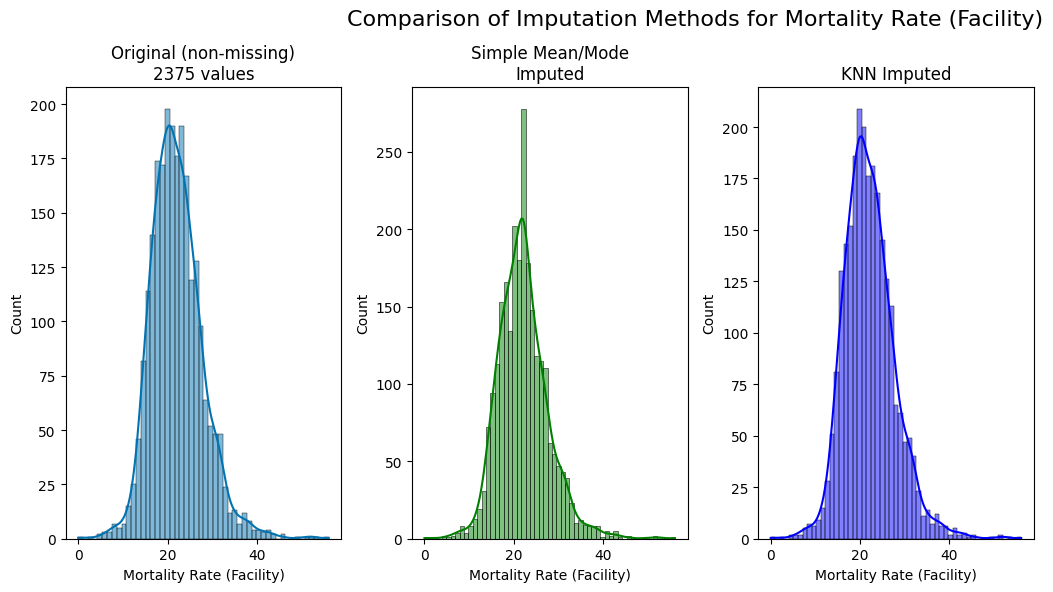

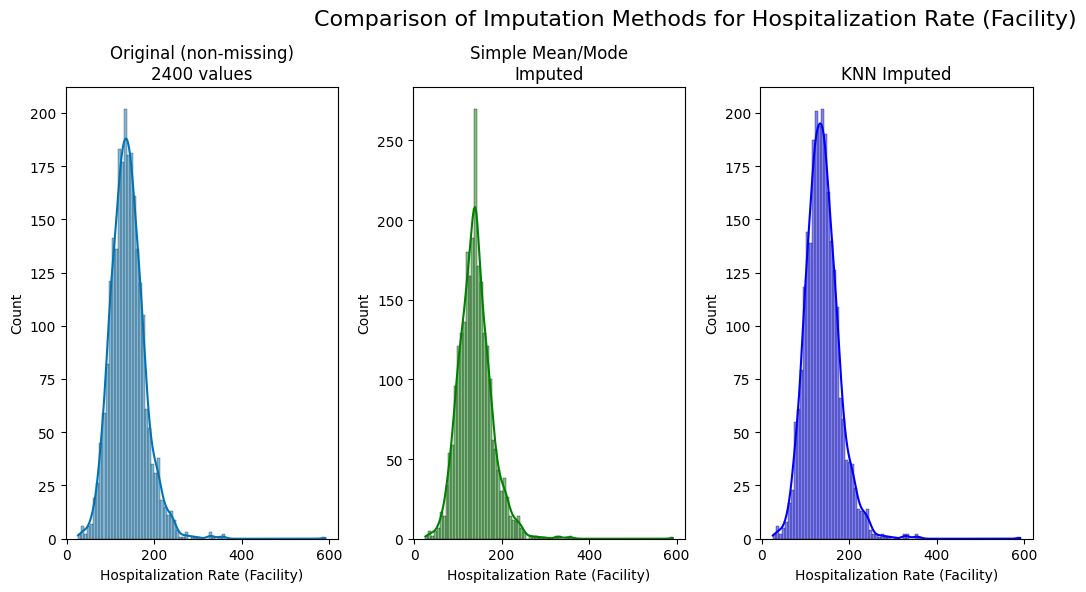

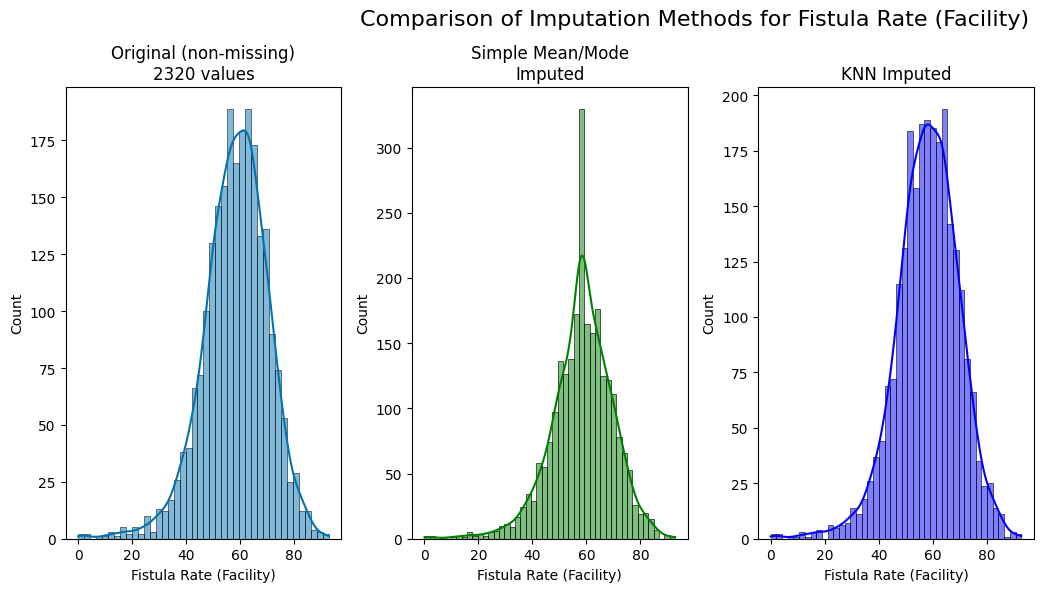

Imputation completed using the KNN method


In [5]:
# Compare imputation methods
def compare_imputation_methods(original_df, simple_df, knn_df, column):
    if column not in original_df.columns or original_df[column].isnull().sum() == 0:
        return print(f"No missing values in {column}")

    plt.figure(figsize=(14, 6))

    # Original distribution
    plt.subplot(1, 4, 1)
    sns.histplot(original_df[column].dropna(), kde=True)
    plt.title(f"Original (non-missing)\n{original_df[column].dropna().shape[0]} values")
    plt.tight_layout()

    # Simple imputation
    plt.subplot(1, 4, 2)
    sns.histplot(simple_df[column], kde=True, color='green')
    plt.title(f"Simple Mean/Mode\nImputed")
    plt.tight_layout()

    # KNN imputation
    plt.subplot(1, 4, 3)
    sns.histplot(knn_df[column], kde=True, color='blue')
    plt.title(f"KNN Imputed")
    plt.tight_layout()



    plt.suptitle(f"Comparison of Imputation Methods for {column}", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'imputation_comparison_{column}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Compare imputation for a few key metrics
for col in ['Mortality Rate (Facility)', 'Hospitalization Rate (Facility)', 'Fistula Rate (Facility)'][:3]:
    if col in df.columns:
        compare_imputation_methods(df, df_imputed_simple, df_imputed_knn, col)

# Select the best imputation method based on visual inspection

df_imputed = df_imputed_knn.copy()
print("Imputation completed using the KNN method")

In [6]:
df_imputed.to_csv('DFC_imputed.csv', index=False)



Columns with missing values:


,Missing Values,Percentage (%)
Five Star,185,7.4


<Figure size 1600x800 with 0 Axes>

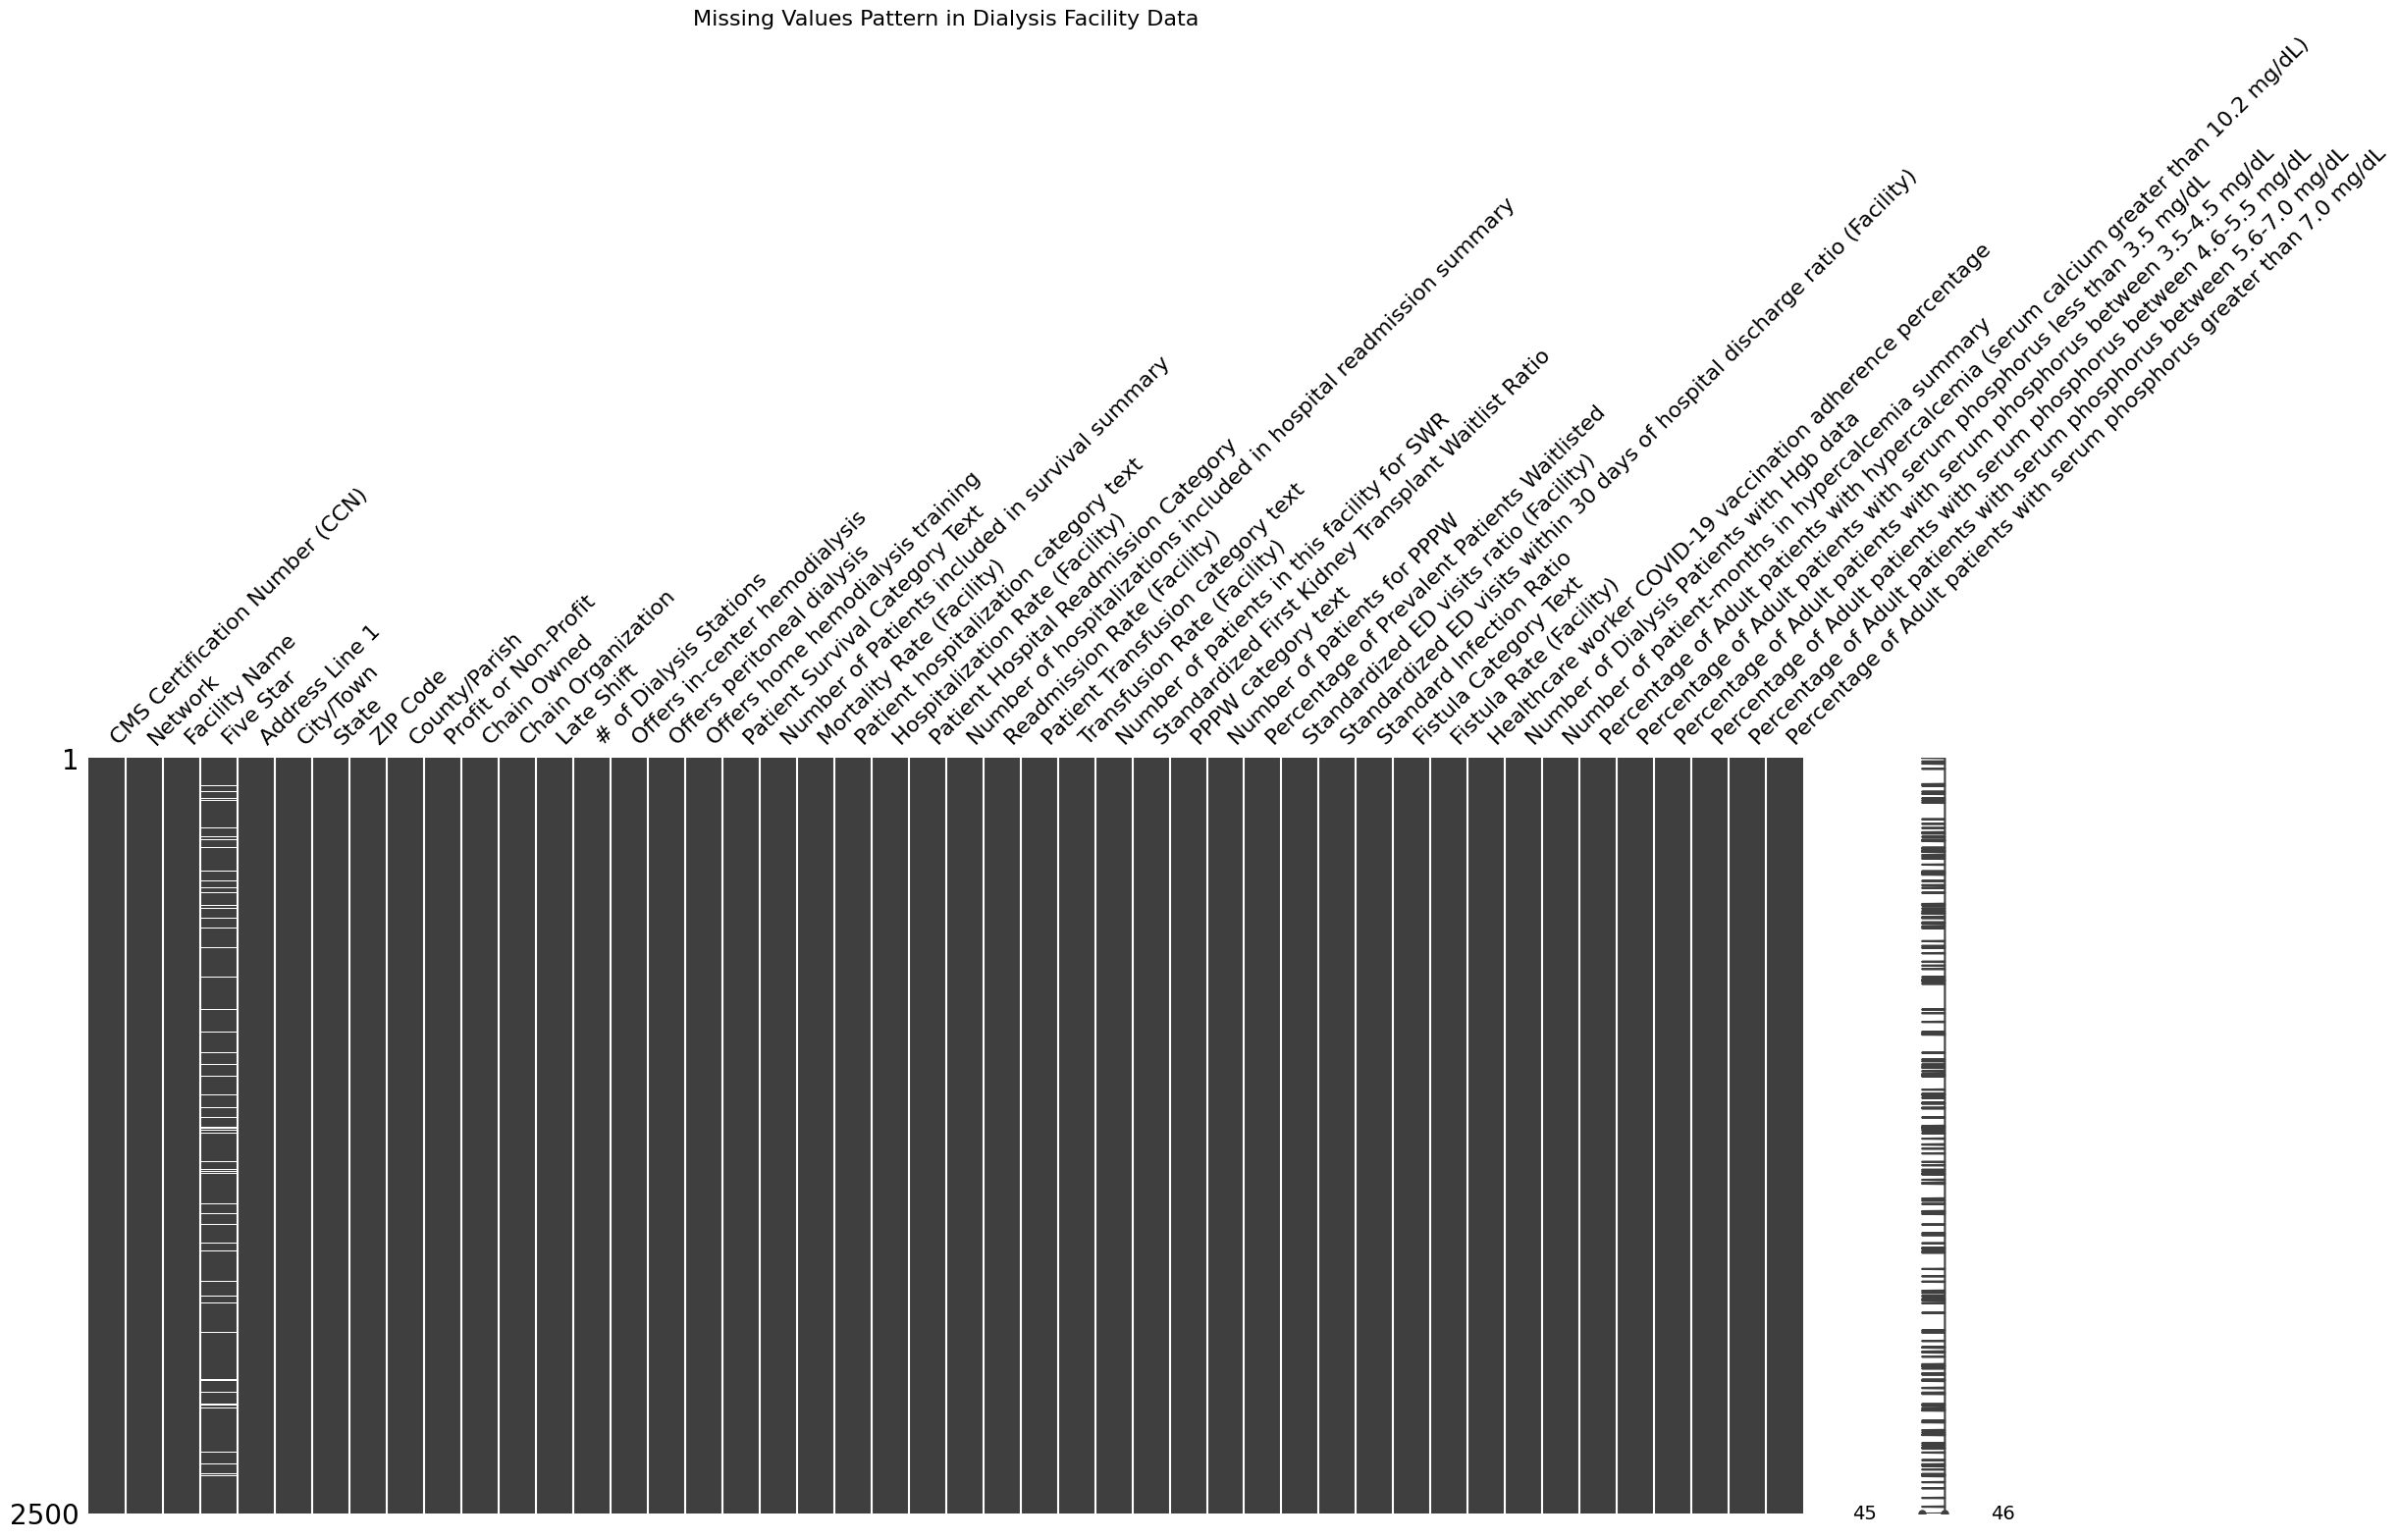

In [7]:
# Check missing values
missing_values = df_imputed.isnull().sum()
missing_percentage = (missing_values / len(df_imputed)) * 100

# Create a DataFrame to display missing value information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Display only columns with missing values
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Values', ascending=False)
print("\nColumns with missing values:")
display(missing_info)

# Visualize missing values pattern
plt.figure(figsize=(16, 8))
msno.matrix(df_imputed)
plt.title('Missing Values Pattern in Dialysis Facility Data', fontsize=16)
plt.tight_layout()
plt.show()


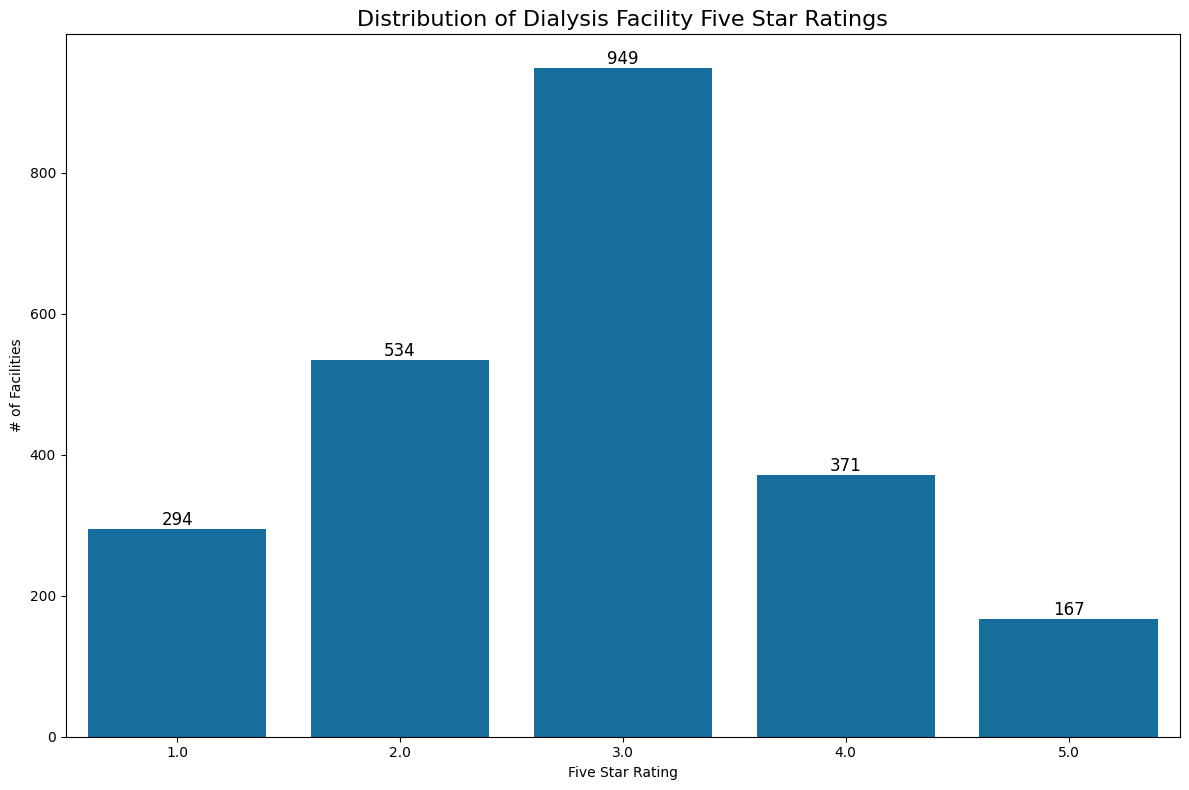

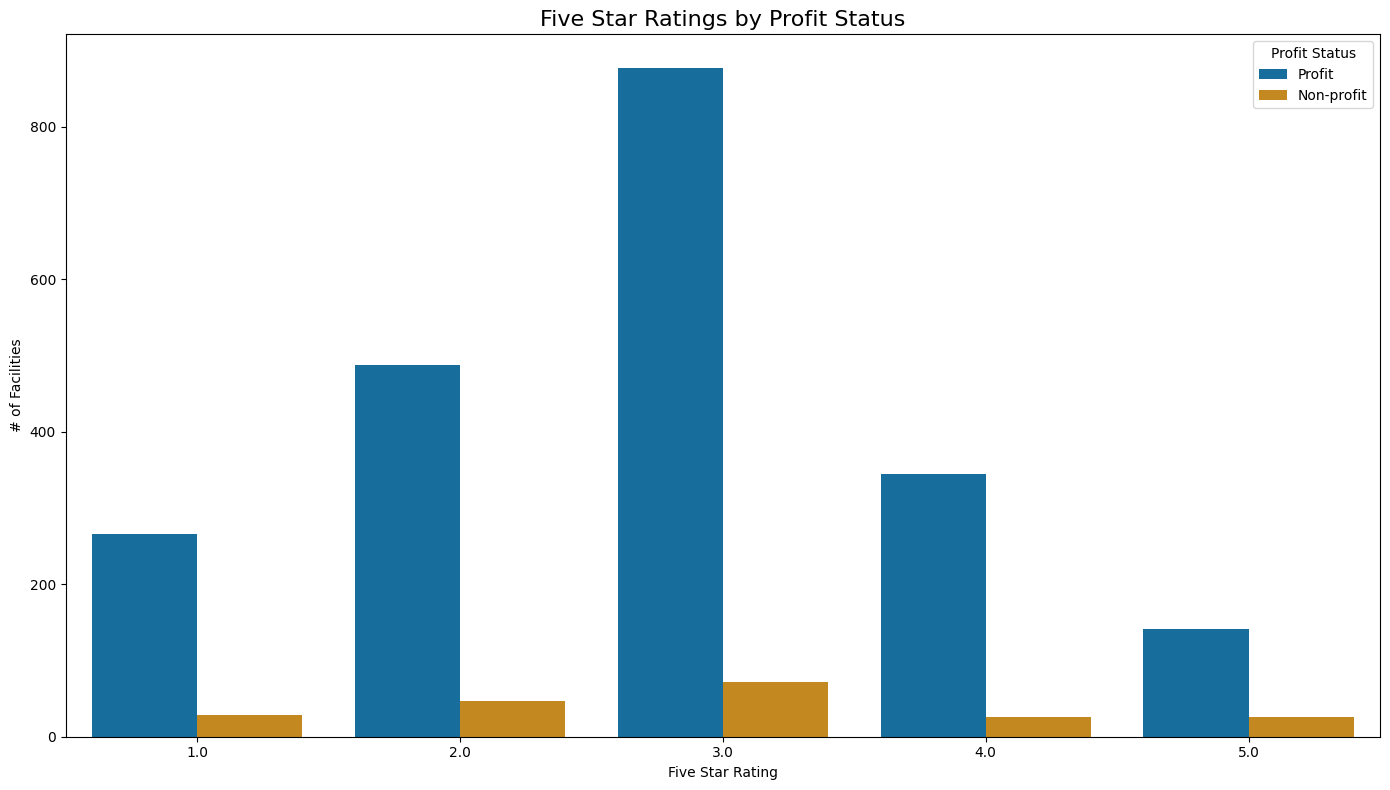

In [8]:
def analyze_quality_ratings(data):
    plt.figure(figsize=(12, 8))

    # Count plot of Five Star ratings
    if 'Five Star' in data.columns:
        ax = sns.countplot(data=data, x='Five Star', order=sorted(data['Five Star'].dropna().unique()))
        plt.title('Distribution of Dialysis Facility Five Star Ratings', fontsize=16)
        plt.xlabel('Five Star Rating')
        plt.ylabel('# of Facilities')

        # Add count labels
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'bottom', fontsize=12)

        plt.tight_layout()
        plt.savefig('five_star_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

    # Quality ratings by profit status
    if 'Five Star' in data.columns and 'Profit or Non-Profit' in data.columns:
        plt.figure(figsize=(14, 8))
        sns.countplot(data=data, x='Five Star', hue='Profit or Non-Profit', order=sorted(data['Five Star'].dropna().unique()))
        plt.title('Five Star Ratings by Profit Status', fontsize=16)
        plt.xlabel('Five Star Rating')
        plt.ylabel('# of Facilities')
        plt.legend(title='Profit Status')
        plt.tight_layout()
        plt.savefig('five_star_by_profit_status.png', dpi=300, bbox_inches='tight')
        plt.show()

analyze_quality_ratings(df_imputed)


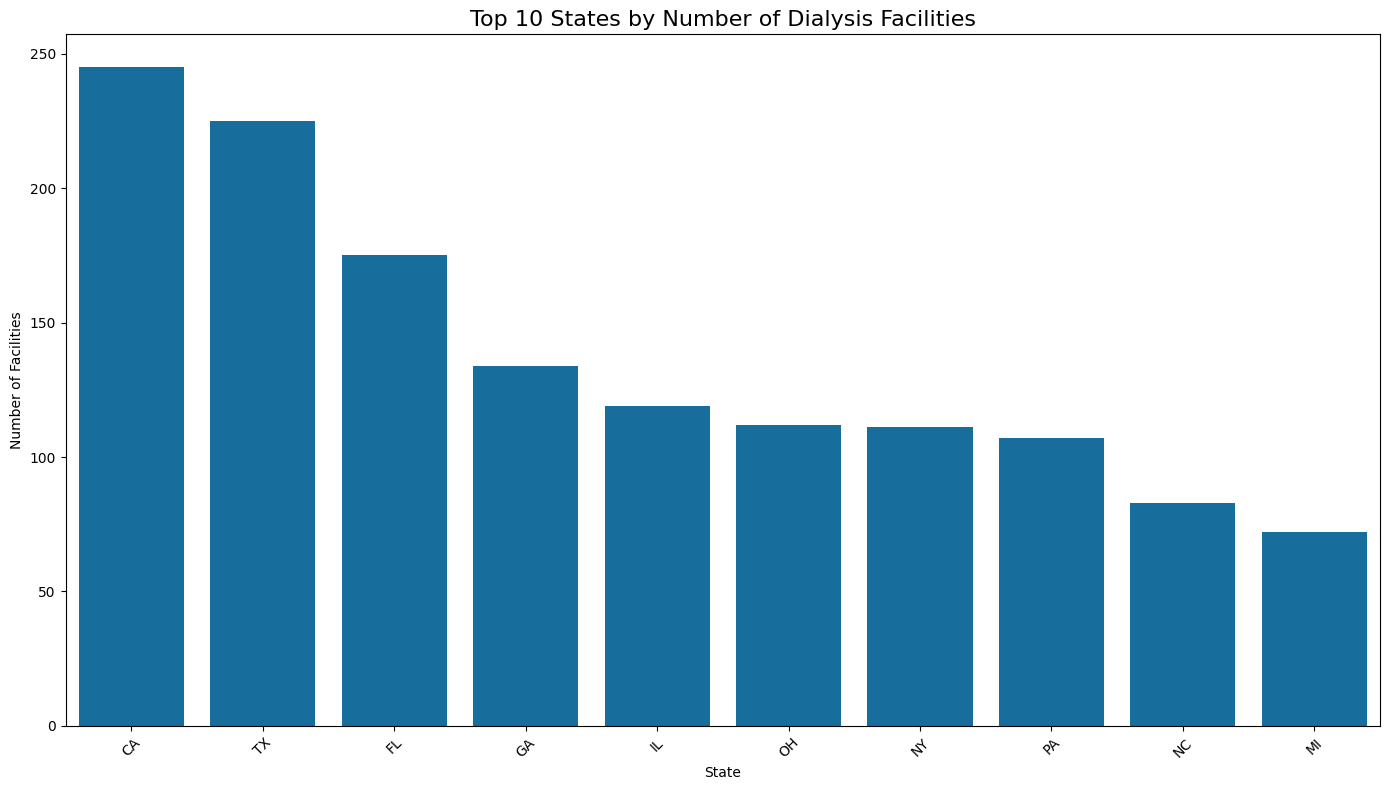

In [9]:
def analyze_geographic_distribution(data):
    # Count facilities by state
    if 'State' in data.columns:
        state_counts = data['State'].value_counts().reset_index()
        state_counts.columns = ['State', 'Number of Facilities']

        # Create a choropleth map using plotly
        fig = px.choropleth(state_counts,
                            locations='State',
                            locationmode="USA-states",
                            color='Number of Facilities',
                            scope="usa",
                            color_continuous_scale="Viridis",
                            title="Number of Dialysis Facilities by State")

        fig.update_layout(coloraxis_colorbar=dict(title="Number of Facilities"),
                         margin=dict(l=0, r=0, t=50, b=0))
        fig.show()

        # Top 10 states by facility count
        plt.figure(figsize=(14, 8))
        top_states = state_counts.head(10)
        sns.barplot(data=top_states, x='State', y='Number of Facilities')
        plt.title('Top 10 States by Number of Dialysis Facilities', fontsize=16)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('top_10_states.png', dpi=300, bbox_inches='tight')
        plt.show()

analyze_geographic_distribution(df_imputed)


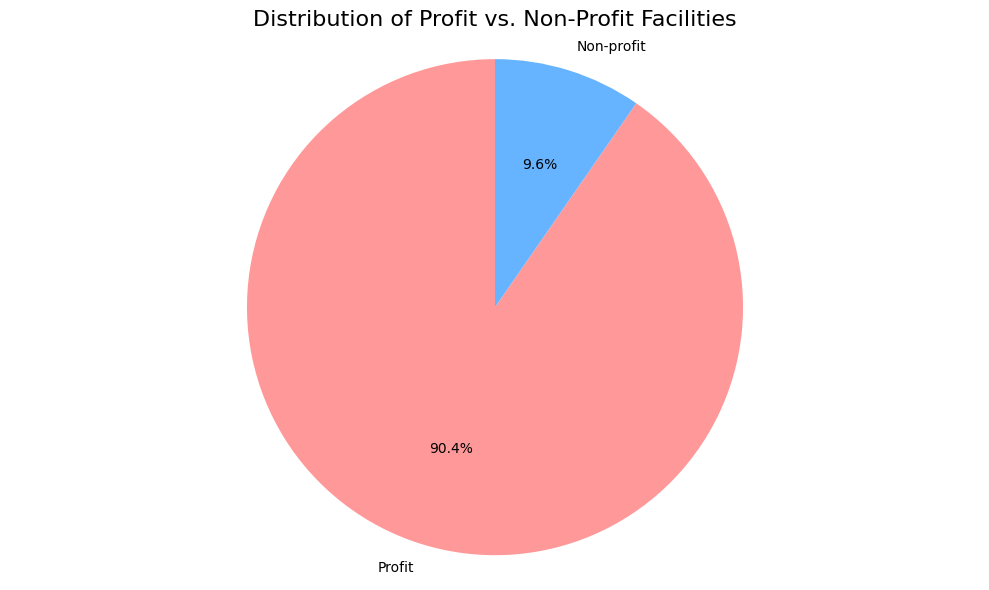

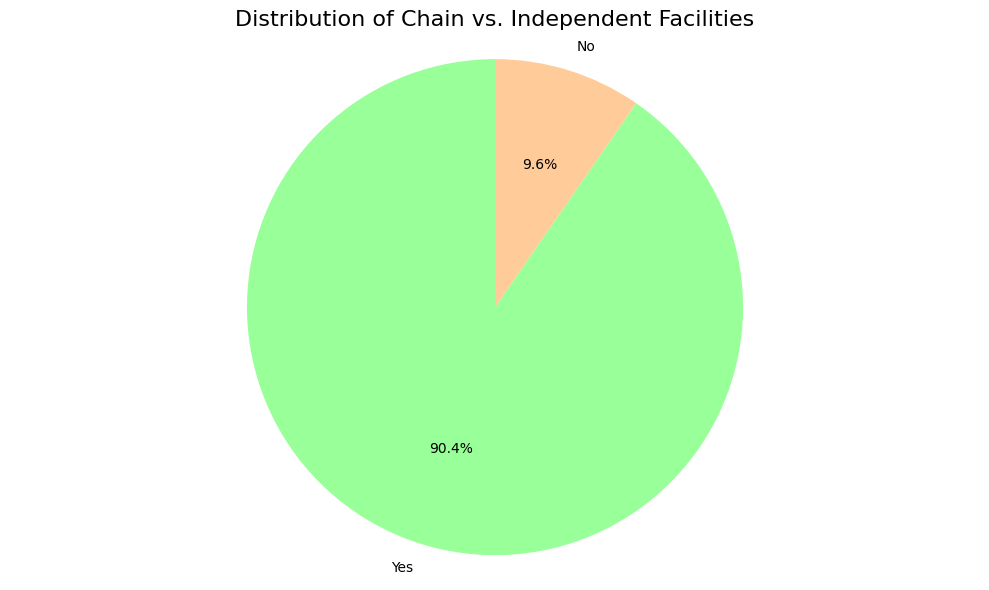

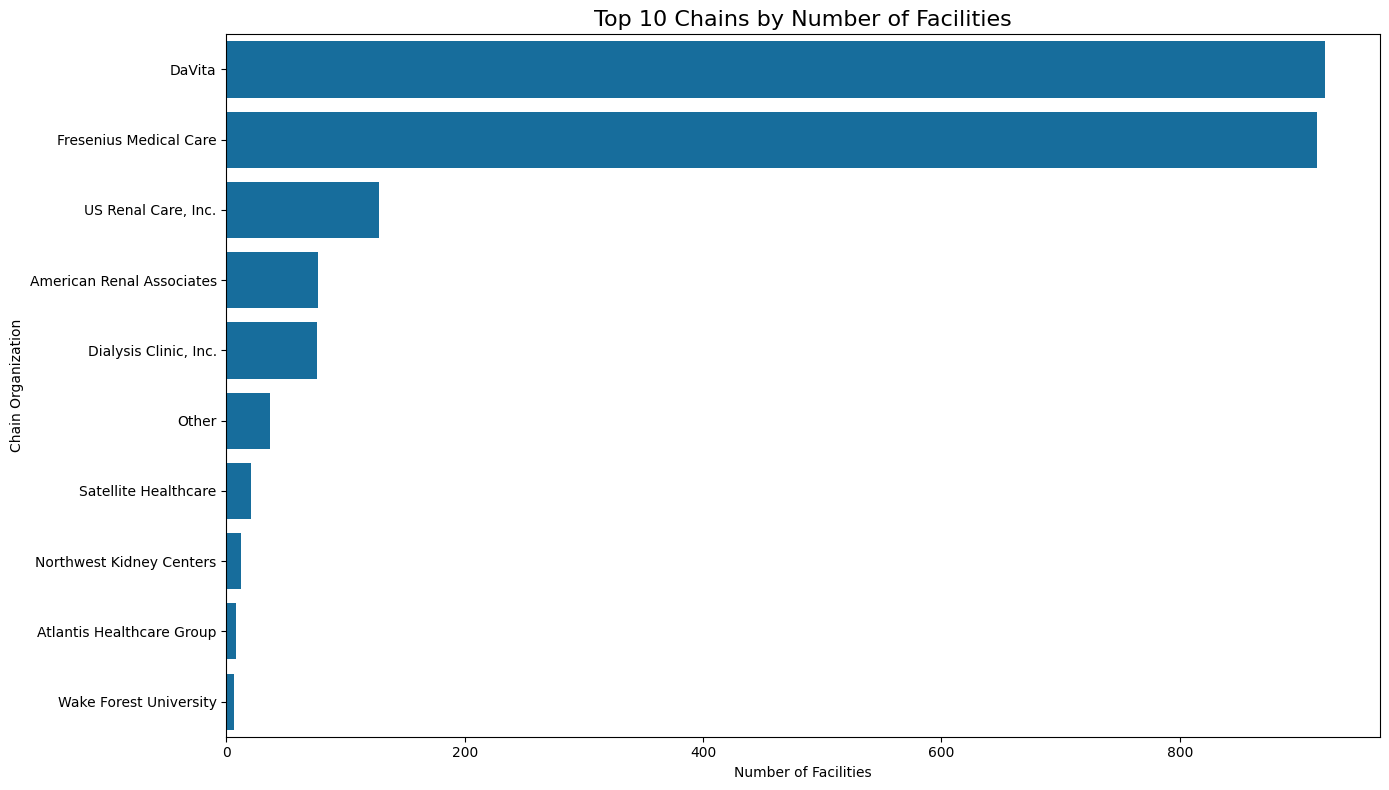

In [10]:
def analyze_ownership(data):
    # Distribution of profit vs non-profit facilities
    if 'Profit or Non-Profit' in data.columns:
        plt.figure(figsize=(10, 6))
        profit_counts = data['Profit or Non-Profit'].value_counts()
        plt.pie(profit_counts, labels=profit_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
        plt.title('Distribution of Profit vs. Non-Profit Facilities', fontsize=16)
        plt.axis('equal')
        plt.tight_layout()
        plt.savefig('profit_vs_nonprofit.png', dpi=300, bbox_inches='tight')
        plt.show()

    # Analysis of chain ownership
    if 'Chain Owned' in data.columns:
        plt.figure(figsize=(10, 6))
        chain_counts = data['Chain Owned'].value_counts()
        plt.pie(chain_counts, labels=chain_counts.index, autopct='%1.1f%%', startangle=90, colors=['#99ff99','#ffcc99'])
        plt.title('Distribution of Chain vs. Independent Facilities', fontsize=16)
        plt.axis('equal')
        plt.tight_layout()
        plt.savefig('chain_vs_independent.png', dpi=300, bbox_inches='tight')
        plt.show()

    # Top chains by number of facilities
    if 'Chain Organization' in data.columns and 'Chain Owned' in data.columns:
        chain_facilities = data[data['Chain Owned'] == 'Yes']
        top_chains = chain_facilities['Chain Organization'].value_counts().head(10).reset_index()
        top_chains.columns = ['Chain Organization', 'Number of Facilities']

        plt.figure(figsize=(14, 8))
        sns.barplot(data=top_chains, x='Number of Facilities', y='Chain Organization')
        plt.title('Top 10 Chains by Number of Facilities', fontsize=16)
        plt.tight_layout()
        plt.savefig('top_10_chains.png', dpi=300, bbox_inches='tight')
        plt.show()

analyze_ownership(df_imputed)


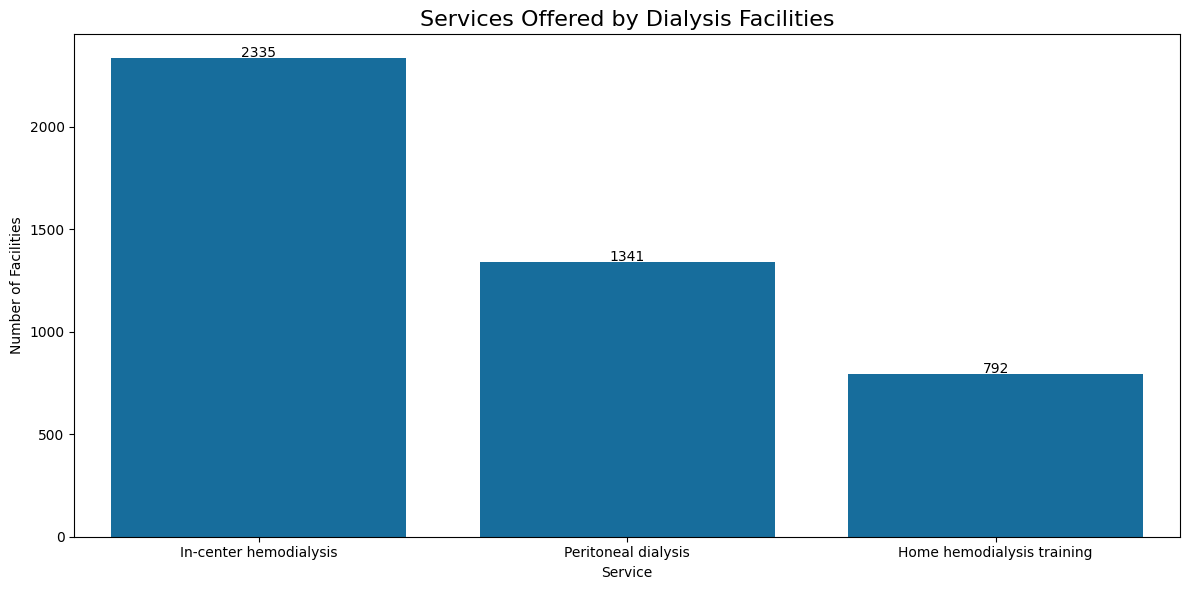

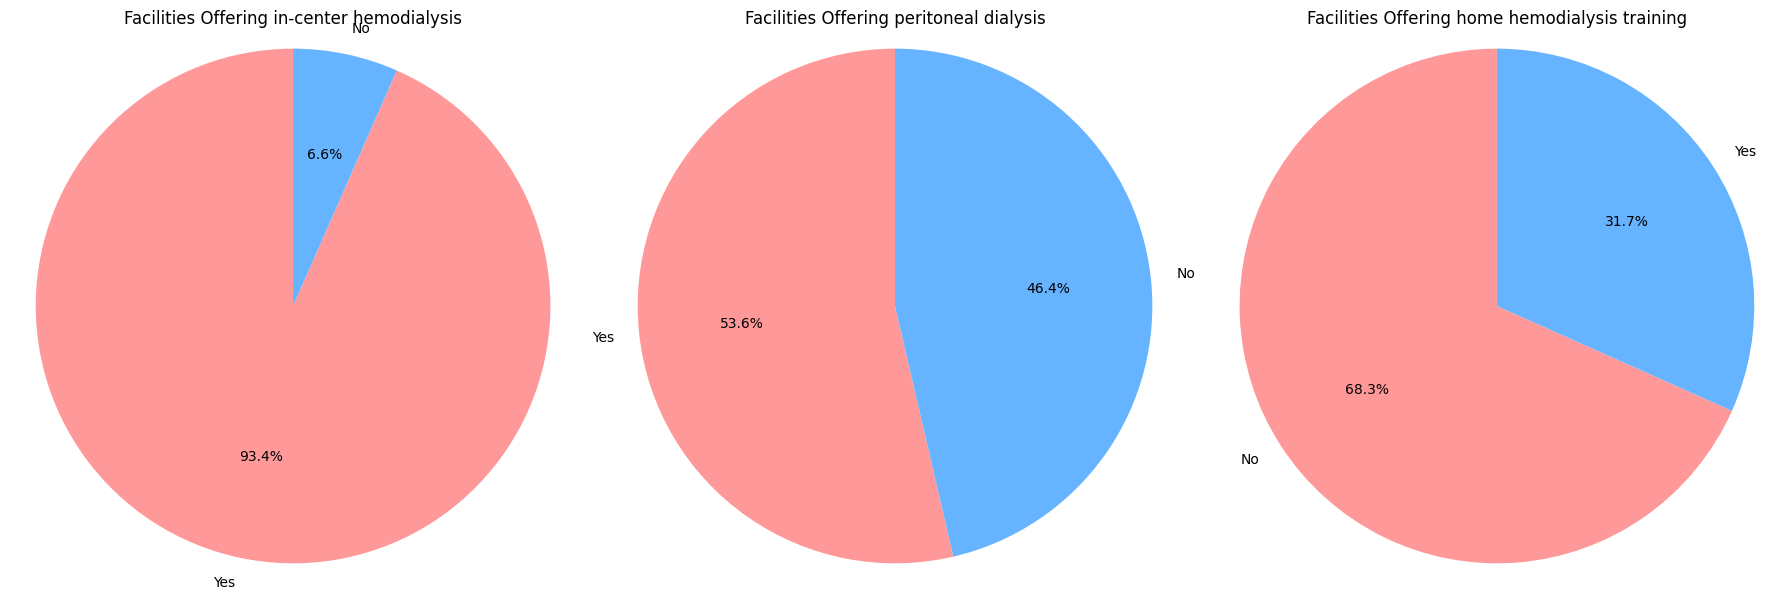

In [11]:
def analyze_services(data):
    # Create a DataFrame for services offered
    services_df = pd.DataFrame({
        'Service': ['In-center hemodialysis', 'Peritoneal dialysis', 'Home hemodialysis training'],
        'Count': [
            data['Offers in-center hemodialysis'].value_counts().get('Yes', 0),
            data['Offers peritoneal dialysis'].value_counts().get('Yes', 0),
            data['Offers home hemodialysis training'].value_counts().get('Yes', 0)
        ]
    })

    plt.figure(figsize=(12, 6))
    sns.barplot(data=services_df, x='Service', y='Count')
    plt.title('Services Offered by Dialysis Facilities', fontsize=16)
    plt.ylabel('Number of Facilities')
    plt.xticks(rotation=0)

    # Add count labels
    for i, v in enumerate(services_df['Count']):
        plt.text(i, v + 5, str(v), ha='center')

    plt.tight_layout()
    plt.savefig('services_offered.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Calculate percentage of facilities offering each service
    total_facilities = len(data)
    services_df['Percentage'] = (services_df['Count'] / total_facilities) * 100

    # Create a pie chart for each service
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, service in enumerate(['Offers in-center hemodialysis', 'Offers peritoneal dialysis', 'Offers home hemodialysis training']):
        if service in data.columns:
            counts = data[service].value_counts()
            axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
            axes[i].set_title(f'Facilities Offering {service.replace("Offers ", "")}')
            axes[i].axis('equal')

    plt.tight_layout()
    plt.savefig('services_pie_charts.png', dpi=300, bbox_inches='tight')
    plt.show()

analyze_services(df_imputed)


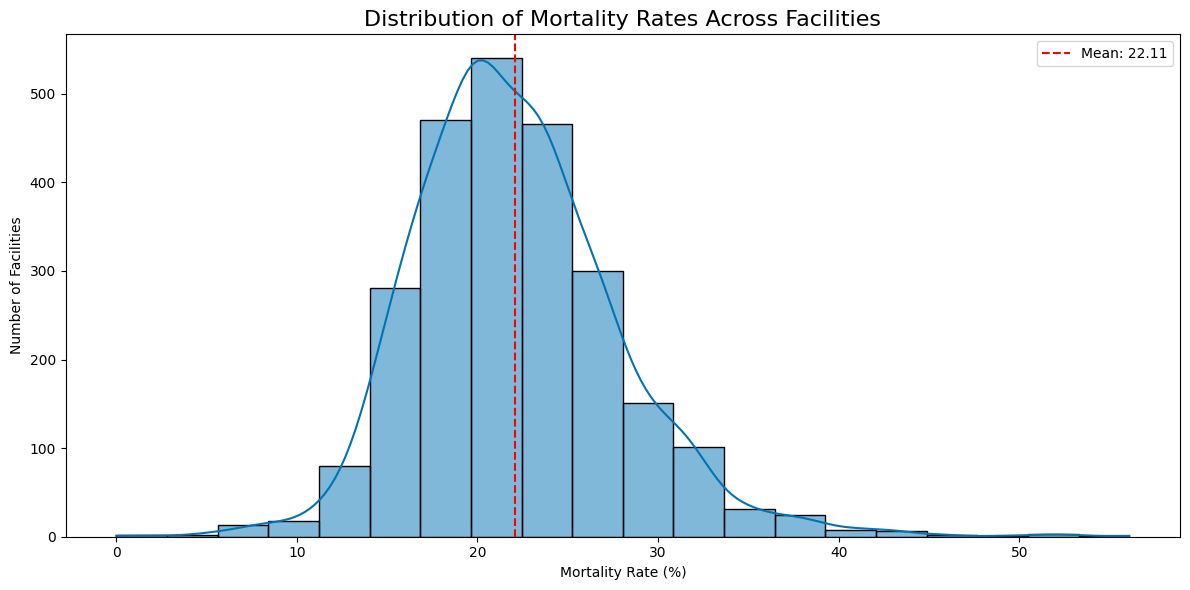

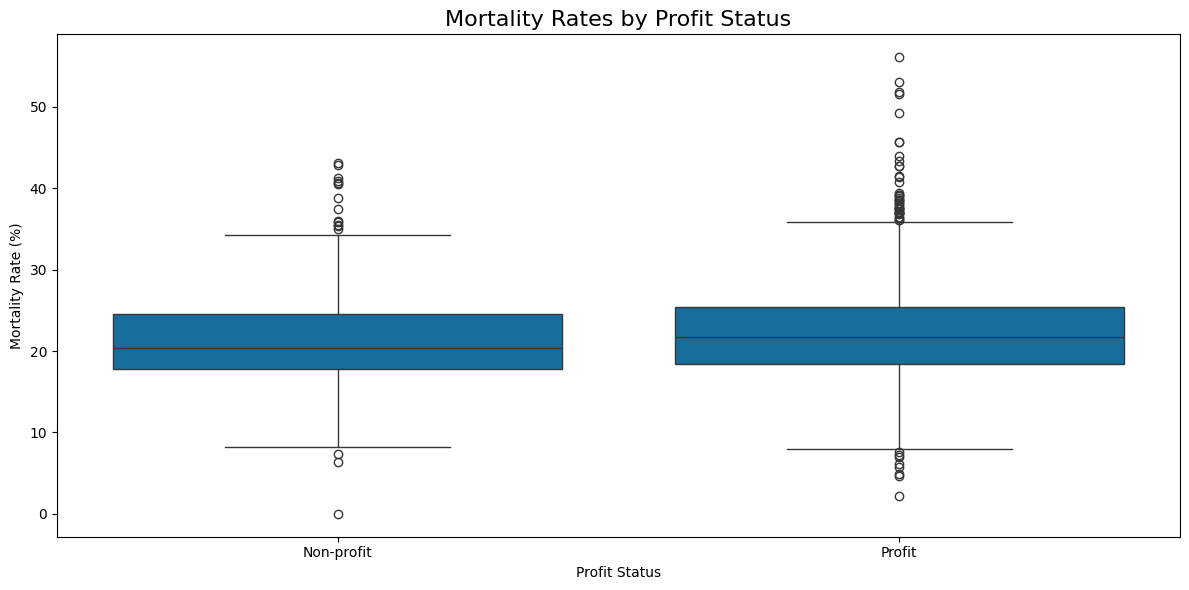

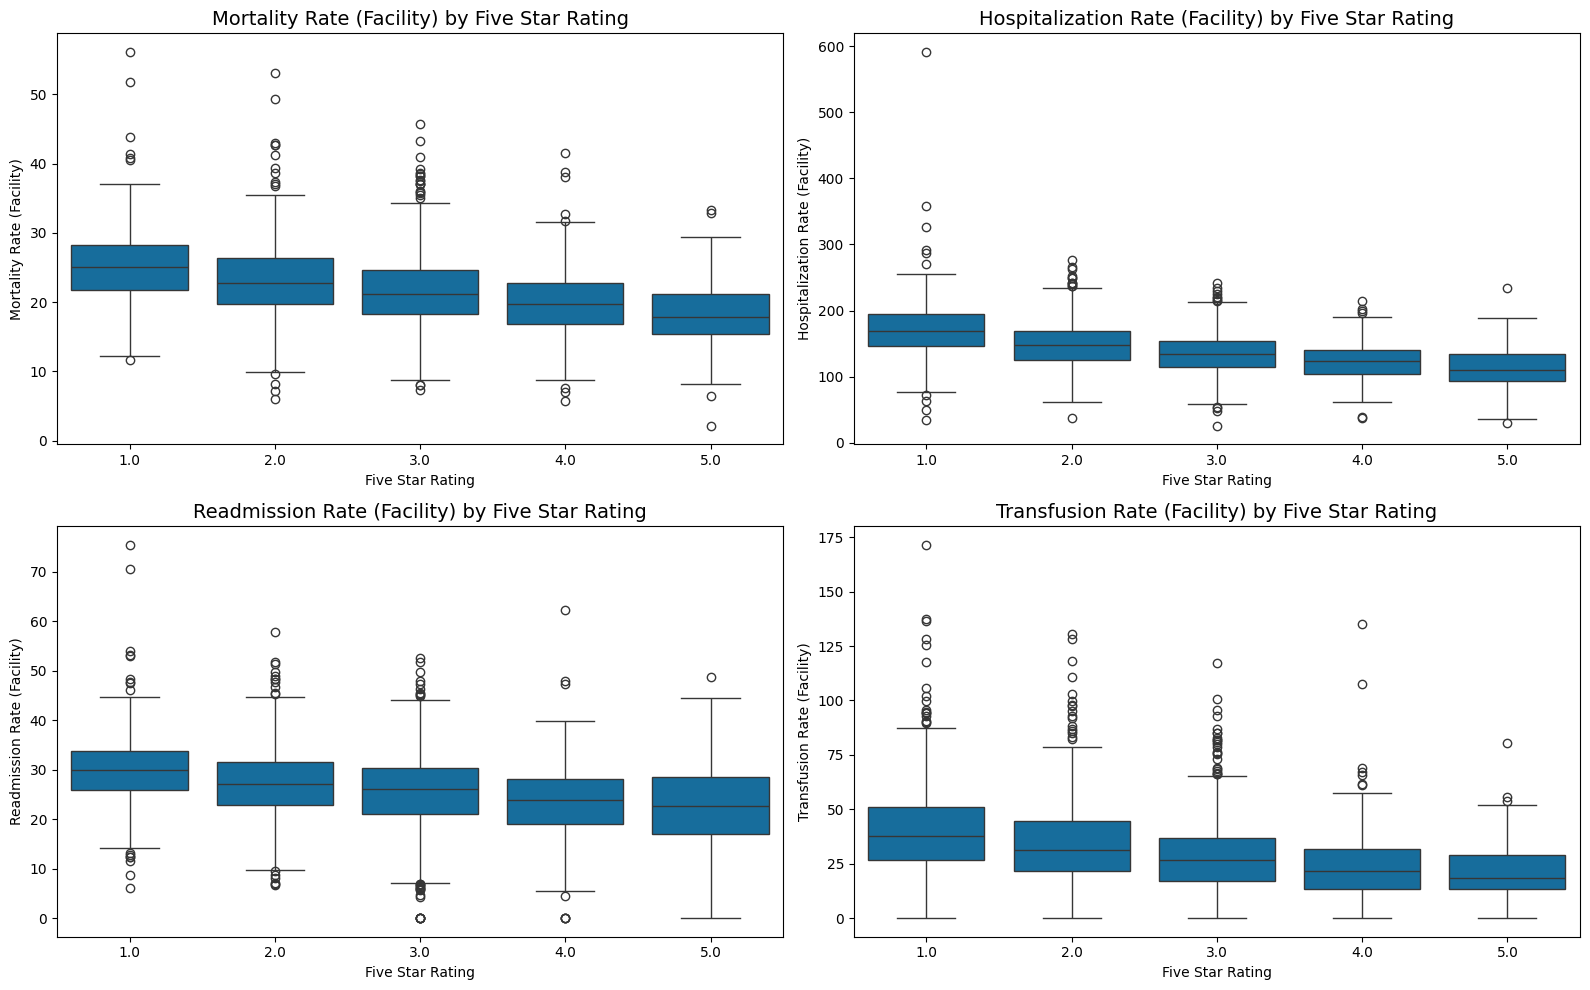

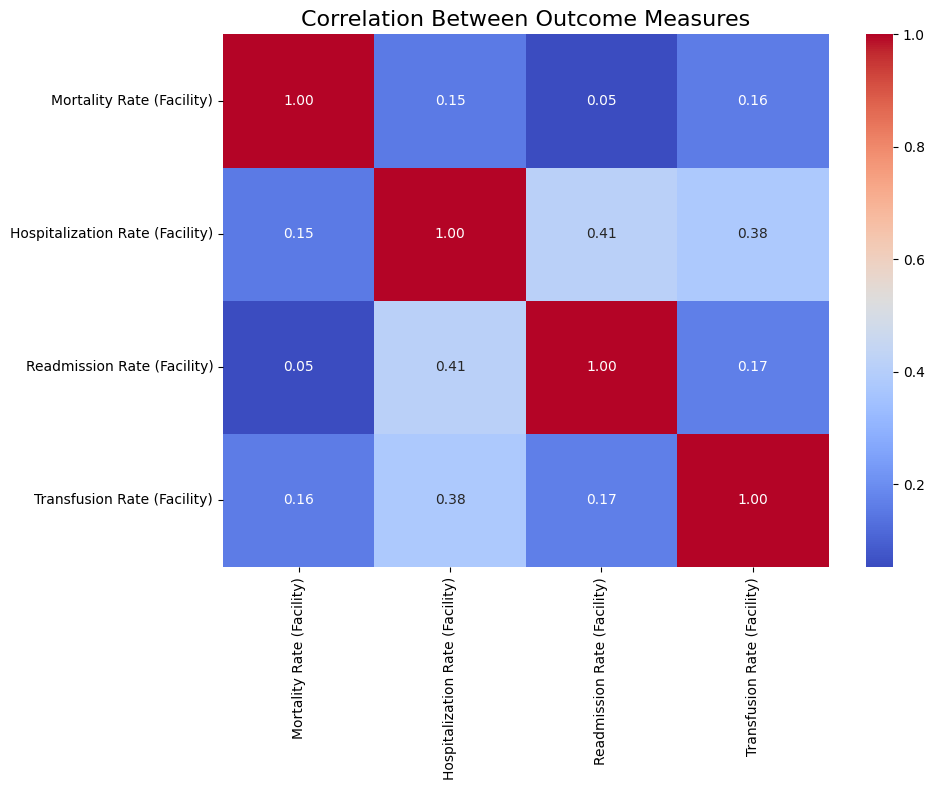

In [12]:
def analyze_patient_outcomes(data):
    # Distribution of mortality rates
    if 'Mortality Rate (Facility)' in data.columns:
        plt.figure(figsize=(12, 6))
        sns.histplot(data['Mortality Rate (Facility)'].dropna(), kde=True, bins=20)
        plt.axvline(data['Mortality Rate (Facility)'].dropna().mean(), color='red', linestyle='--',
                   label=f'Mean: {data["Mortality Rate (Facility)"].dropna().mean():.2f}')
        plt.title('Distribution of Mortality Rates Across Facilities', fontsize=16)
        plt.xlabel('Mortality Rate (%)')
        plt.ylabel('Number of Facilities')
        plt.legend()
        plt.tight_layout()
        plt.savefig('mortality_rate_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

    # Compare mortality rates by profit status
    if 'Mortality Rate (Facility)' in data.columns and 'Profit or Non-Profit' in data.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=data, x='Profit or Non-Profit', y='Mortality Rate (Facility)')
        plt.title('Mortality Rates by Profit Status', fontsize=16)
        plt.xlabel('Profit Status')
        plt.ylabel('Mortality Rate (%)')
        plt.tight_layout()
        plt.savefig('mortality_by_profit_status.png', dpi=300, bbox_inches='tight')
        plt.show()

    # Compare key outcome measures
    outcome_measures = ['Mortality Rate (Facility)', 'Hospitalization Rate (Facility)',
                       'Readmission Rate (Facility)','Transfusion Rate (Facility)']
    outcome_present = [col for col in outcome_measures if col in data.columns]

    if outcome_present:
        plt.figure(figsize=(16, 10))
        for i, measure in enumerate(outcome_present):
            plt.subplot(2, 2, i+1)
            sns.boxplot(data=data, x='Five Star', y=measure)
            plt.title(f'{measure} by Five Star Rating', fontsize=14)
            plt.xlabel('Five Star Rating')
            plt.ylabel(measure)
            plt.xticks(rotation=0)

        plt.tight_layout()
        plt.savefig('outcomes_by_rating.png', dpi=300, bbox_inches='tight')
        plt.show()

    # Correlation between outcome measures
    if len(outcome_present) > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(data[outcome_present].corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Between Outcome Measures', fontsize=16)
        plt.tight_layout()
        plt.savefig('outcome_correlation.png', dpi=300, bbox_inches='tight')
        plt.show()

analyze_patient_outcomes(df_imputed)


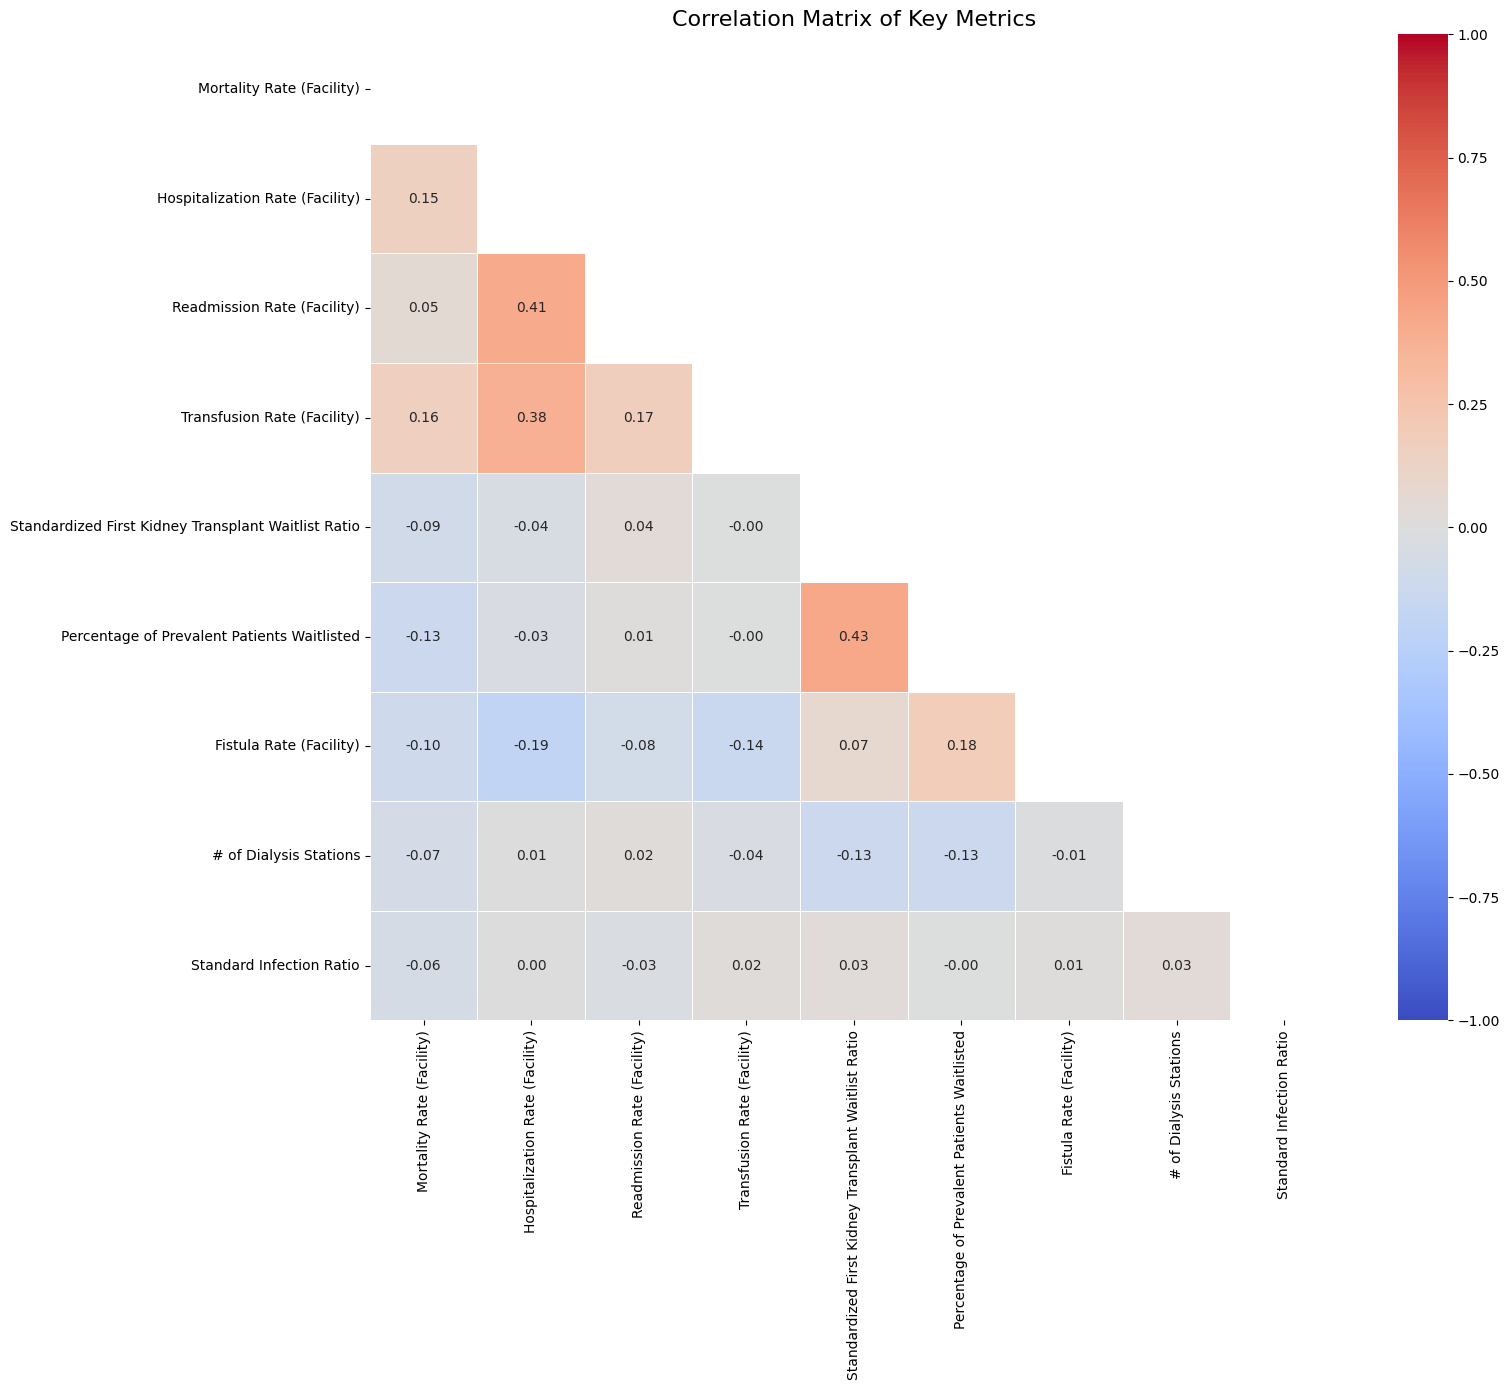

Strong correlations found:
Hospitalization Rate (Facility) and Readmission Rate (Facility): 0.41
Standardized First Kidney Transplant Waitlist Ratio and Percentage of Prevalent Patients Waitlisted: 0.43


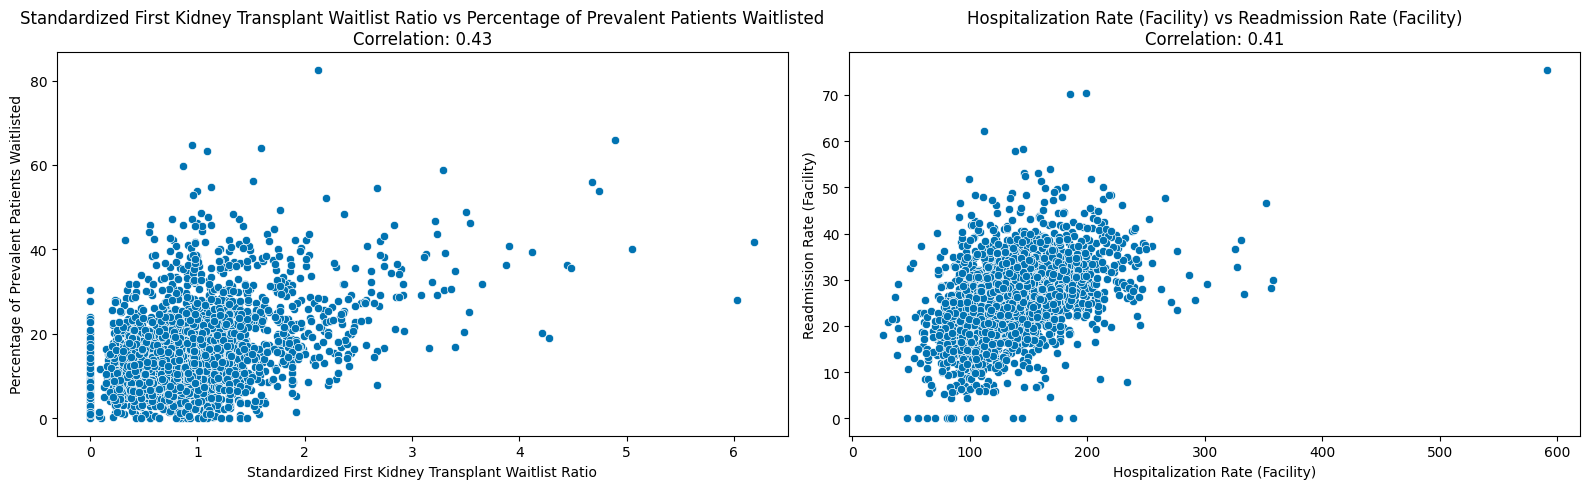

In [13]:
def correlation_analysis(data):
    # Select numerical columns
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Select relevant metrics (excluding identification columns)
    metrics = [col for col in numerical_cols if col not in [
        'CMS Certification Number (CCN)', 'Network', 'Five Star Date', 'Five Star',
        'ZIP Code', 'Certification Date'
    ]]

    # If we have too many metrics, select important ones
    if len(metrics) > 15:
        important_metrics = [
            'Mortality Rate (Facility)', 'Hospitalization Rate (Facility)',
            'Readmission Rate (Facility)', 'Transfusion Rate (Facility)',
            'Standardized First Kidney Transplant Waitlist Ratio',
            'Percentage of Prevalent Patients Waitlisted',
            'Fistula Rate (Facility)',
            '# of Dialysis Stations',
            'Standard Infection Ratio'
        ]

        metrics = [m for m in important_metrics if m in data.columns]

    if len(metrics) > 1:
        # Calculate correlation matrix
        corr_matrix = data[metrics].corr()

        # Create heatmap
        plt.figure(figsize=(16, 14))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
                   linewidths=0.5, vmin=-1, vmax=1)
        plt.title('Correlation Matrix of Key Metrics', fontsize=16)
        plt.tight_layout()
        plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Identify strong correlations
        strong_correlations = []

        for i in range(len(metrics)):
            for j in range(i+1, len(metrics)):
                corr_value = corr_matrix.iloc[i, j]
                if abs(corr_value) > 0.4:  # Threshold for strong correlation
                    strong_correlations.append((metrics[i], metrics[j], corr_value))

        if strong_correlations:
            print("Strong correlations found:")
            for var1, var2, corr in strong_correlations:
                print(f"{var1} and {var2}: {corr:.2f}")

            # Create scatter plots for top correlations
            top_correlations = sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True)[:3]

            fig, axes = plt.subplots(1, len(top_correlations), figsize=(16, 5))

            for i, (var1, var2, corr) in enumerate(top_correlations):
                if len(top_correlations) > 1:
                    ax = axes[i]
                else:
                    ax = axes

                sns.scatterplot(data=data, x=var1, y=var2, ax=ax)
                ax.set_title(f"{var1} vs {var2}\nCorrelation: {corr:.2f}", fontsize=12)
                ax.set_xlabel(var1, fontsize=10)
                ax.set_ylabel(var2, fontsize=10)

            plt.tight_layout()
            plt.savefig('top_correlations.png', dpi=300, bbox_inches='tight')
            plt.show()

correlation_analysis(df_imputed)


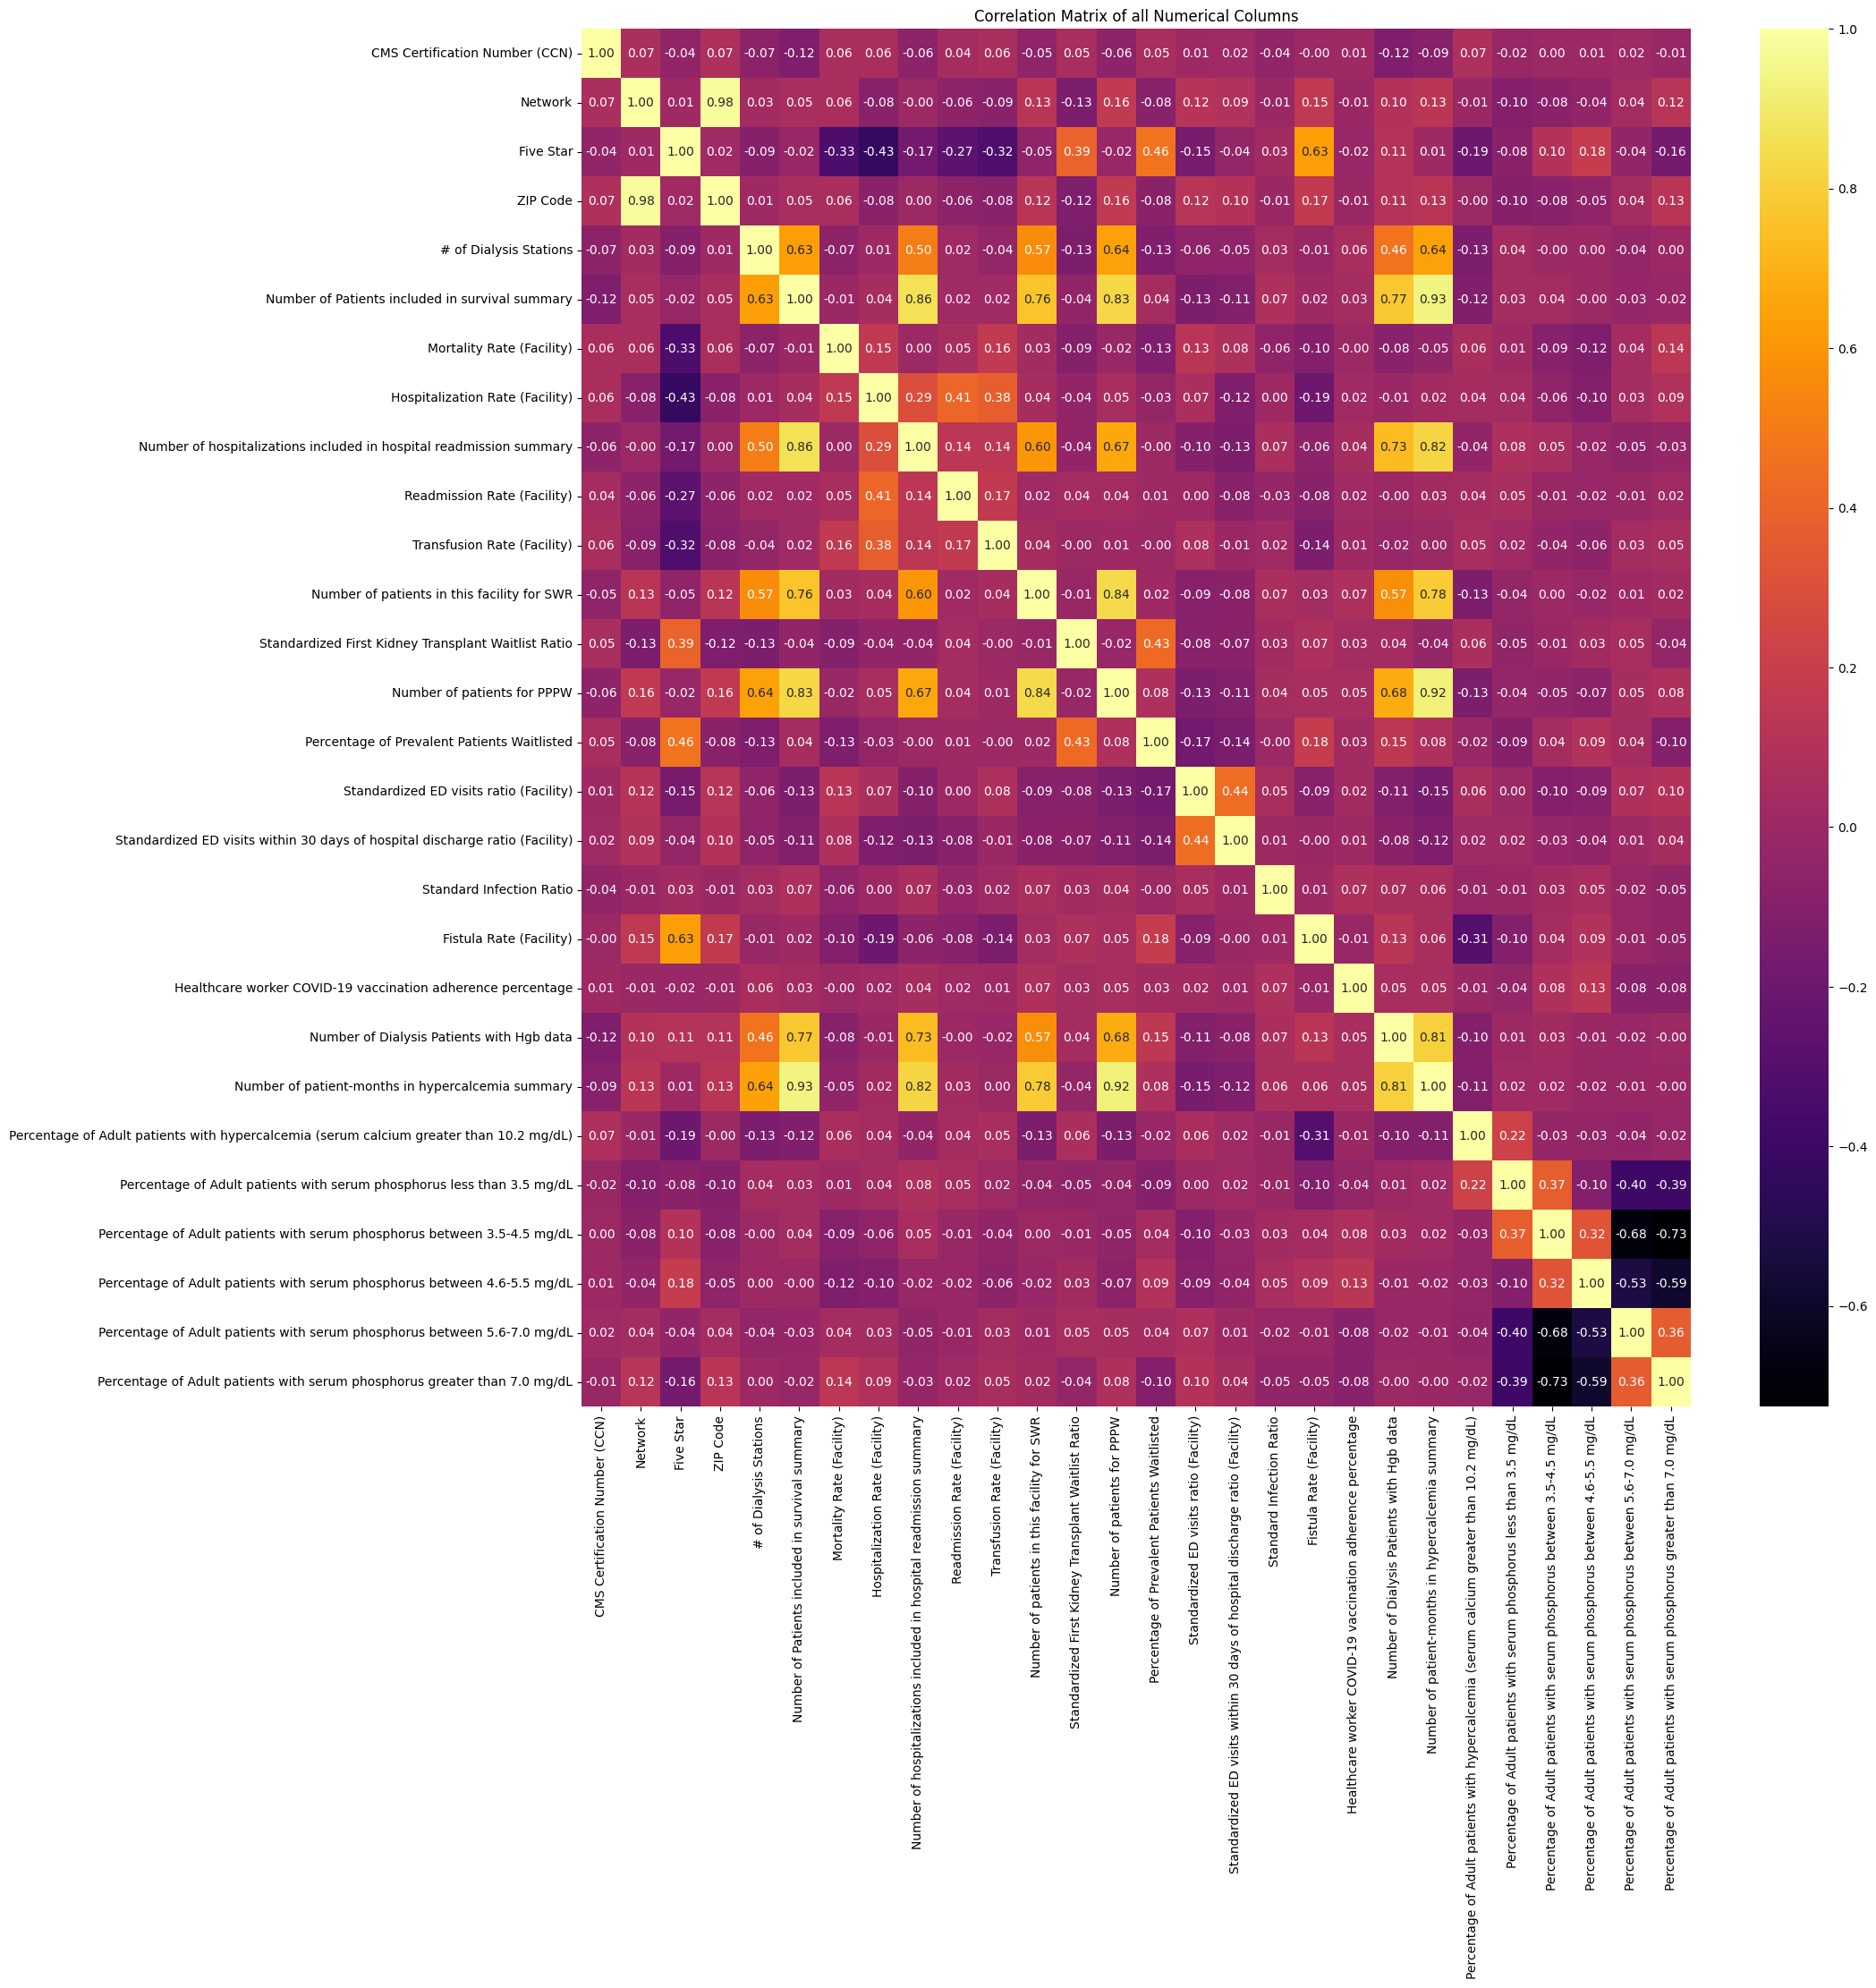

Top 10 highest correlated parameter pairs:
Network                                                              ZIP Code                                                               0.984822
Number of Patients included in survival summary                      Number of patient-months in hypercalcemia summary                      0.933418
Number of patients for PPPW                                          Number of patient-months in hypercalcemia summary                      0.923427
Number of Patients included in survival summary                      Number of hospitalizations included in hospital readmission summary    0.862006
Number of patients in this facility for SWR                          Number of patients for PPPW                                            0.841947
Number of Patients included in survival summary                      Number of patients for PPPW                                            0.828741
Number of hospitalizations included in hospital readmission sum

In [14]:

# Only numerical columns for correlation analysis
numerical_df = df_imputed.select_dtypes(include=np.number)

# the correlation map
plt.figure(figsize=(20, 20))
sns.heatmap(numerical_df.corr(), annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlation Matrix of all Numerical Columns')
plt.show()

corr_matrix = numerical_df.corr().abs()
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]
corr_pairs = corr_pairs.drop_duplicates()
sorted_pairs = corr_pairs.sort_values(ascending=False)

# Display top 10 highest correlated pairs
print("Top 10 highest correlated parameter pairs:")
print(sorted_pairs.head(10))

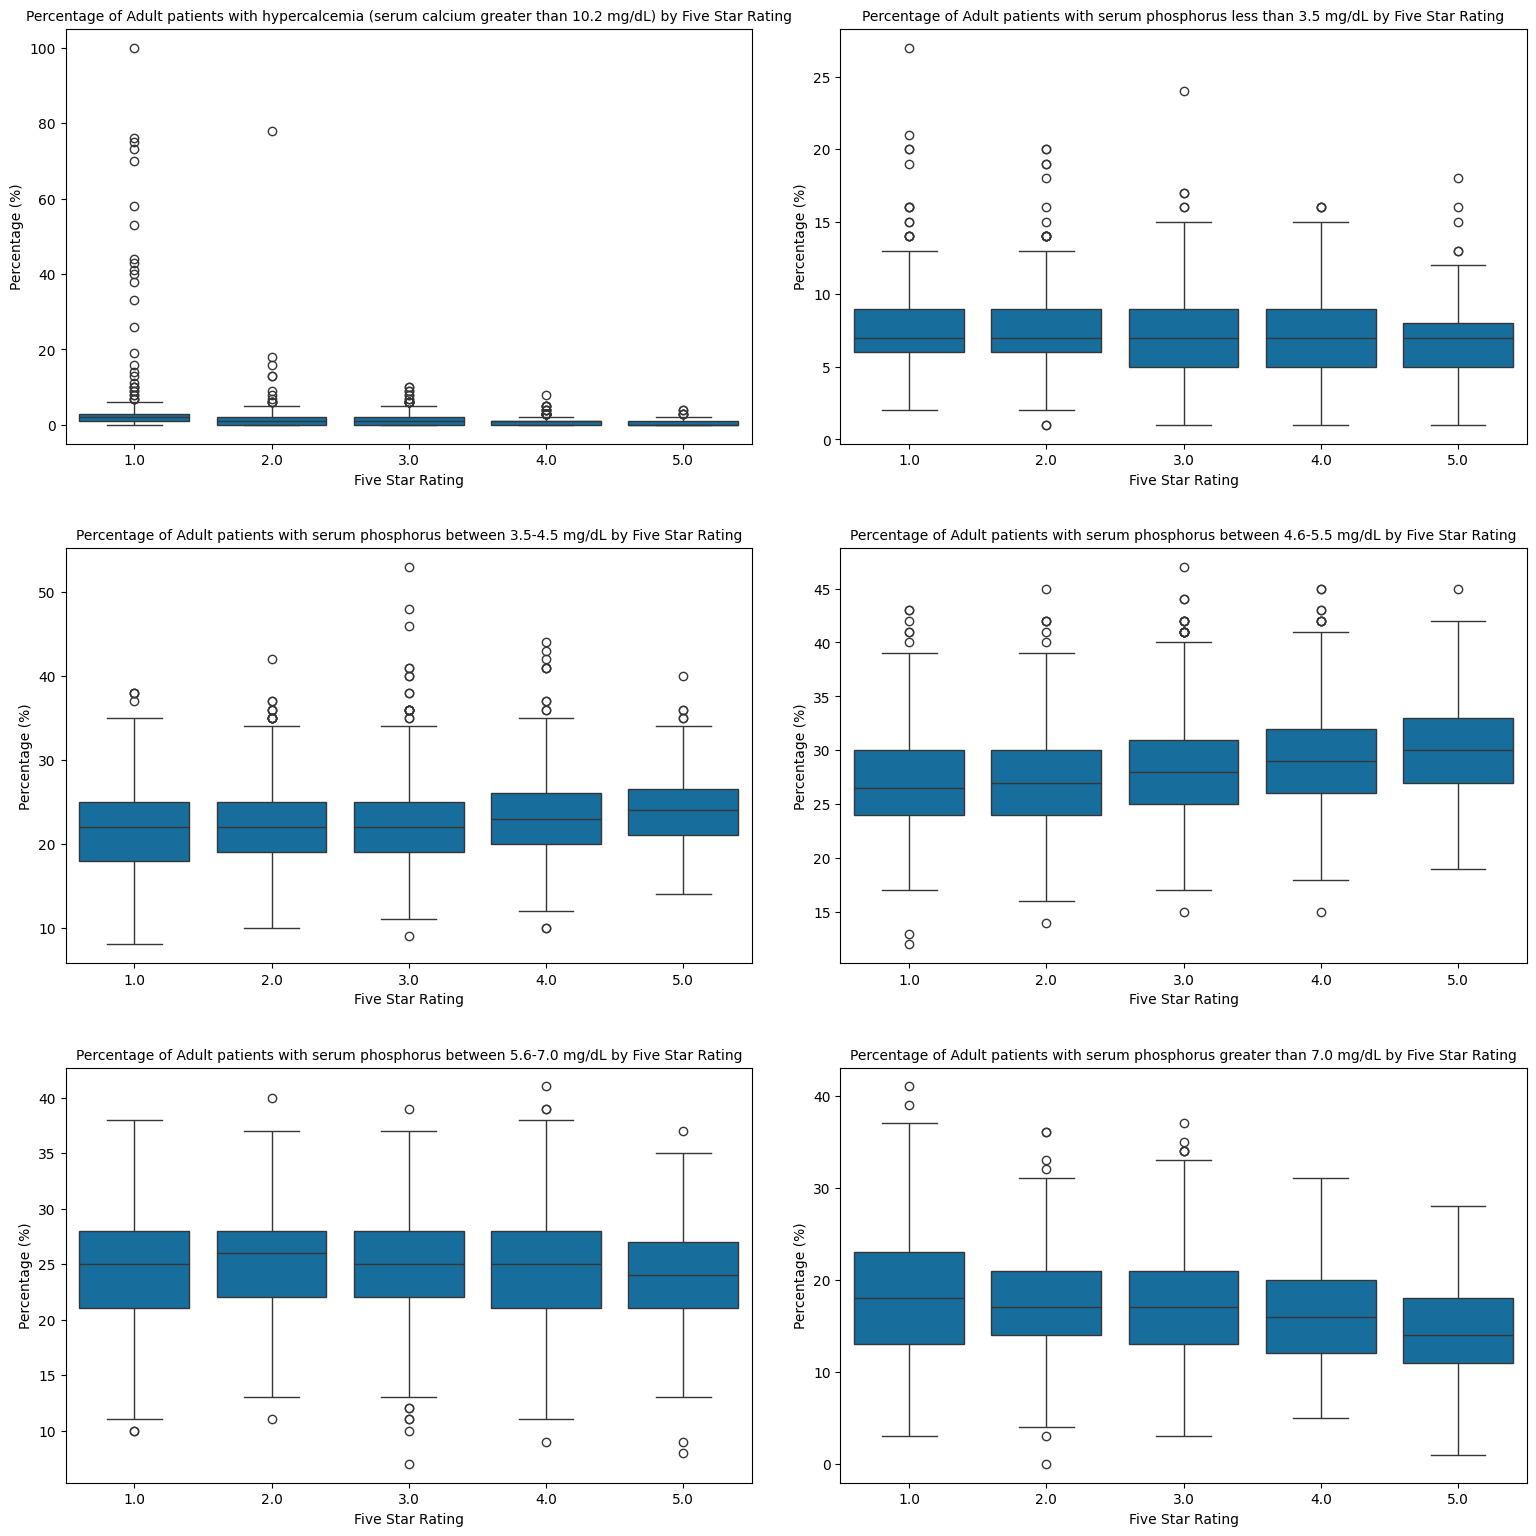

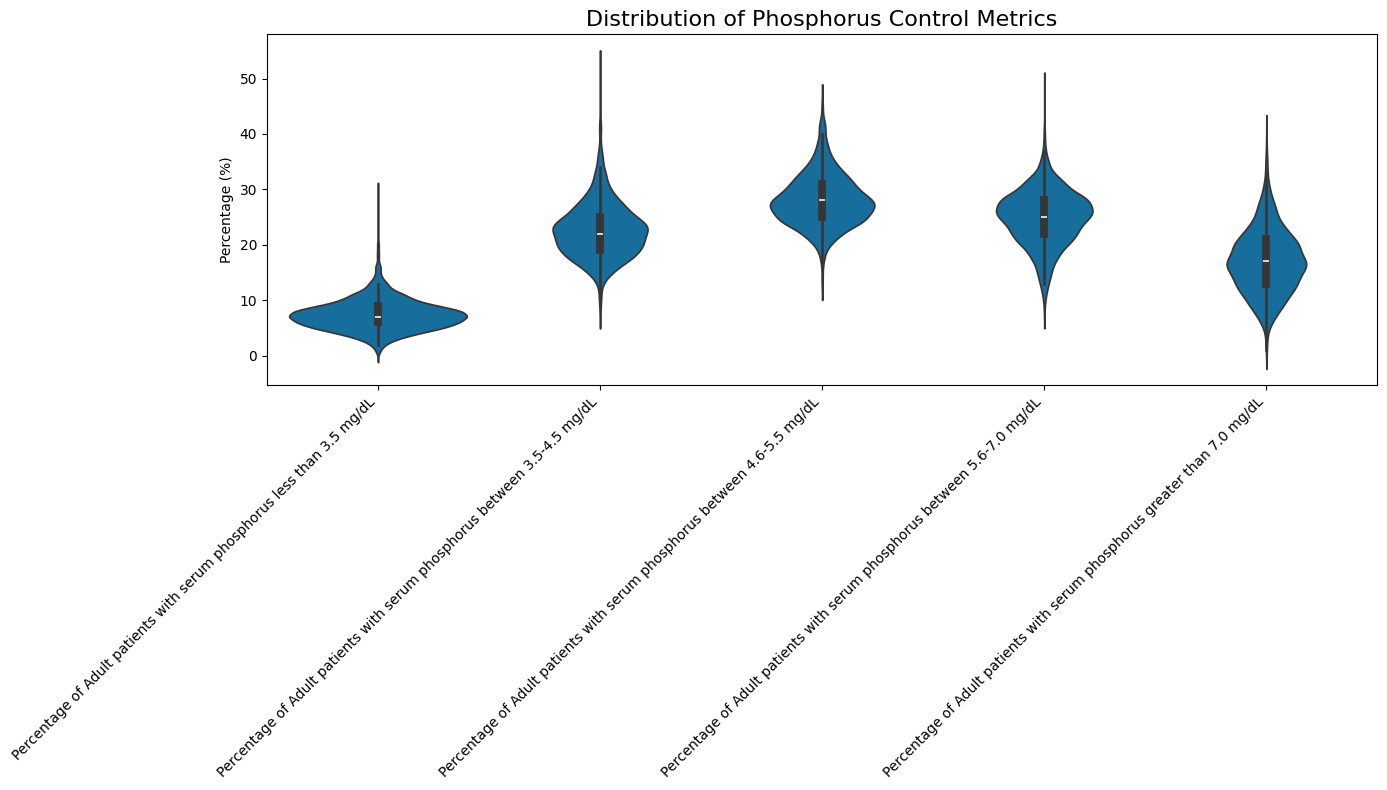

In [15]:
def analyze_quality_metrics(data):
    # Clinical quality metrics
    quality_metrics = [
        'Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)',
        'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL',
        'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL',
        'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL',
        'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL',
        'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL'
    ]

    metrics_present = [col for col in quality_metrics if col in data.columns]

    if metrics_present:
        # Create a boxplot for each quality metric
        plt.figure(figsize=(16, 16))
        for i, metric in enumerate(metrics_present):
            plt.subplot(3, 2, i+1)
            sns.boxplot(data=data, x='Five Star', y=metric)
            plt.title(f'{metric} by Five Star Rating', fontsize=10)
            plt.xlabel('Five Star Rating')
            plt.ylabel('Percentage (%)')
            plt.xticks(rotation=0)
            plt.tight_layout(pad=3)

        plt.savefig('quality_metrics_by_rating.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Create a violin plot comparing phosphorus control metrics
        phosphorus_metrics = [col for col in metrics_present if 'phosphorus' in col.lower()]

        if len(phosphorus_metrics) >= 2:
            # Reshape data for plotting
            phosphorus_data = pd.melt(
                data[['Facility Name'] + phosphorus_metrics],
                id_vars=['Facility Name'],
                value_vars=phosphorus_metrics,
                var_name='Metric',
                value_name='Percentage'
            )

            plt.figure(figsize=(14, 8))
            sns.violinplot(data=phosphorus_data, x='Metric', y='Percentage')
            plt.title('Distribution of Phosphorus Control Metrics', fontsize=16)
            plt.xlabel('')
            plt.ylabel('Percentage (%)')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.savefig('phosphorus_metrics.png', dpi=300, bbox_inches='tight')
            plt.show()

analyze_quality_metrics(df_imputed)


Missing values in features: 0
Missing values in target: 0
Best parameters: {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validation score: 0.5815298317185109
Test set accuracy: 0.5593952483801296
\nClassification Report:\n               precision    recall  f1-score   support

           1       0.64      0.54      0.59        59
           2       0.48      0.39      0.43       107
           3       0.57      0.79      0.66       190
           4       0.47      0.27      0.34        74
           5       0.82      0.42      0.56        33

    accuracy                           0.56       463
   macro avg       0.60      0.48      0.52       463
weighted avg       0.56      0.56      0.54       463



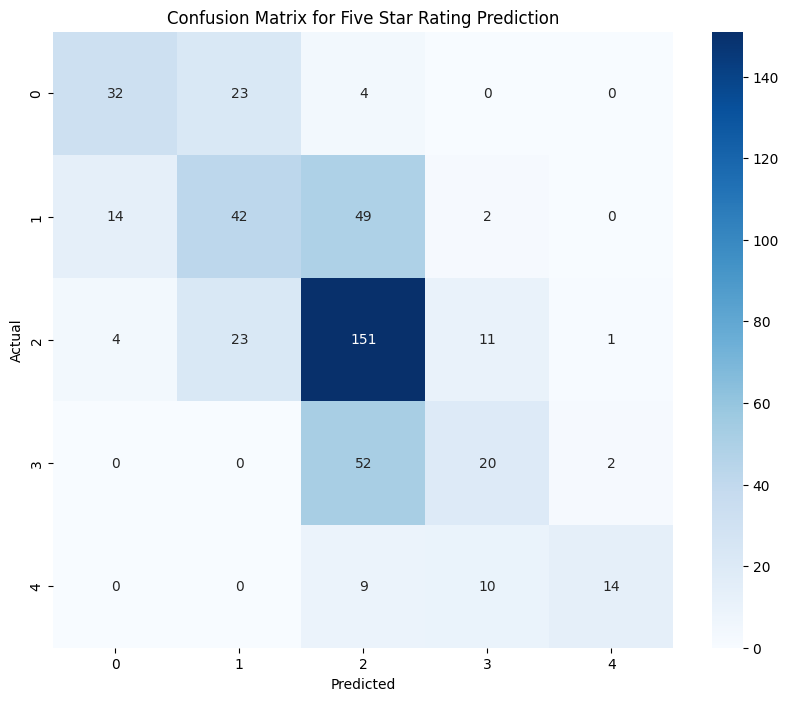

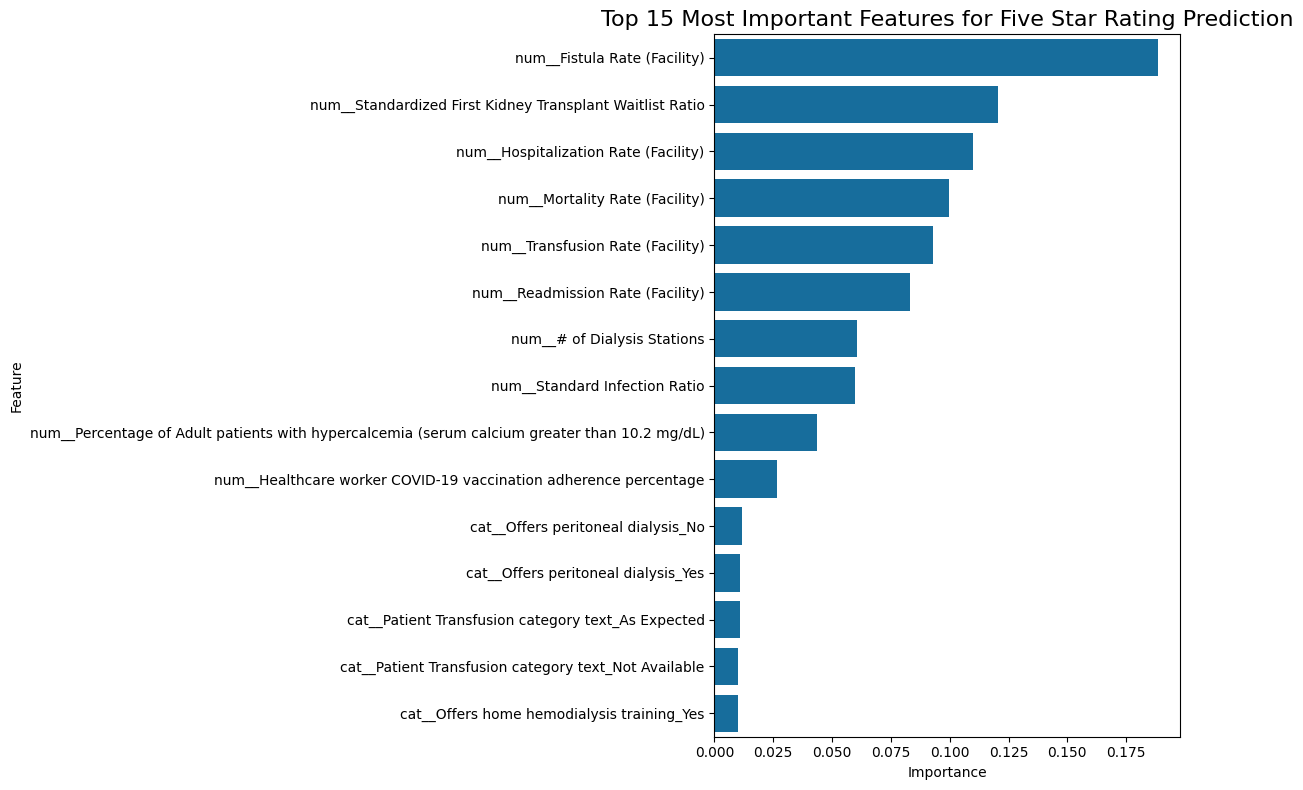

Gradient Boosting Cross-Validation Accuracy: 0.5832 ± 0.0145
Accuracy on non-missing data: 0.8492
Number of facilities with large rating discrepancies: 22
Top 10 facilities with largest discrepancies:
                                     Facility Name  Five Star  \
31          Fresenius Kidney Care Southern Broward        1.0   
32                         SRS-Los Nietos Dialysis        1.0   
168                        KIDNEY CENTER OF JASPER        1.0   
286  Long Island Community Hospital - West Main St        1.0   
302       BASSETT HEALTHCARE LITTLE FALLS DIALYSIS        1.0   
357        Fresenius Kidney Care Carnes Crossroads        4.0   
542              Fresenius Medical Care of Mashpee        5.0   
574                         DCI Lake Home Dialysis        4.0   
607                                RAI Care Center        1.0   
640                  DaVita East New York Dialysis        1.0   

     Predicted_Five_Star  Difference  
31                   3.0         2.0  
32   

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Target: Five Star Rating

df_imputed = df_imputed.dropna(subset=['Five Star'])
y = df_imputed['Five Star'].astype(int)


features = [
    'Mortality Rate (Facility)', 'Hospitalization Rate (Facility)',
    'Readmission Rate (Facility)','Transfusion Rate (Facility)',
    'Standardized First Kidney Transplant Waitlist Ratio',
    'Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)',
    'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL'
    'Percentage of Prevalent Patients Waitlisted',
    'Healthcare worker COVID-19 vaccination adherence percentage',
    '# of Dialysis Stations', 'Profit or Non-Profit', 'Chain Owned',
    'Fistula Rate (Facility)', 'Standard Infection Ratio',
    'Late Shift',
    'Patient Transfusion category text',
    'Offers in-center hemodialysis', 'Offers peritoneal dialysis',
    'Offers home hemodialysis training',
    'Standardized ED visits within 30 days of hospital discharge ratio',]

X_features = [f for f in features if f in df_imputed.columns]
missing_in_features = df_imputed[X_features].isnull().sum()
missing_in_target = y.isnull().sum()

print(f"Missing values in features: {missing_in_features.sum()}")
print(f"Missing values in target: {missing_in_target}")

valid_indices = ~y.isnull()
X = df_imputed.loc[valid_indices, X_features]
y = y[valid_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a Random Forest classifier
rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

# Define hyperparameters
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__bootstrap': [True, False]}

# Using GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test set accuracy:", accuracy_score(y_test, y_pred))
print("\\nClassification Report:\\n", classification_report(y_test, y_pred))

# Visualize a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Five Star Rating Prediction')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature importance
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    importances = best_model.named_steps['classifier'].feature_importances_
    if hasattr(best_model.named_steps['preprocessor'], 'get_feature_names_out'):
        feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
    else:
        feature_names = [f"feature_{i}" for i in range(len(importances))]
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature')
    plt.title('Top 15 Most Important Features for Five Star Rating Prediction', fontsize=16)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()


# Gradient Boosting model
gb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Evaluate
cv_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='accuracy')
print(f"Gradient Boosting Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Train on the full dataset
gb_clf.fit(X, y)

# Predict
all_predictions = gb_clf.predict(df_imputed.loc[:, X_features])
df_imputed['Predicted_Five_Star'] = np.nan
mask = df_imputed.index.isin(X.index)
df_imputed.loc[mask, 'Predicted_Five_Star'] = all_predictions

# Compare actual vs predicted
if 'Five Star' in df_imputed.columns and 'Predicted_Five_Star' in df_imputed.columns:
    comparison_df = df_imputed[['Facility Name', 'Five Star', 'Predicted_Five_Star']].dropna()
    accuracy = (comparison_df['Five Star'] == comparison_df['Predicted_Five_Star']).mean()
    print(f"Accuracy on non-missing data: {accuracy:.4f}")

    # Identify facilities with differences
    comparison_df['Difference'] = abs(comparison_df['Five Star'] - comparison_df['Predicted_Five_Star'])
    large_discrepancy = comparison_df[comparison_df['Difference'] >= 2].sort_values('Difference', ascending=False)
    print(f"Number of facilities with large rating discrepancies: {len(large_discrepancy)}")
    print("Top 10 facilities with largest discrepancies:")
    print(large_discrepancy.head(10))
    # Save comparison results
    comparison_df.to_csv('five_star_rating_comparison.csv', index=False)

# Five Star ratings for facilities with missing ratings
missing_ratings = df_imputed[df_imputed['Five Star'].isnull()]
if not missing_ratings.empty and 'Predicted_Five_Star' in df_imputed.columns:
    print("Predicted Five Star ratings for facilities with missing actual ratings:")
    print(missing_ratings[['Facility Name', 'Predicted_Five_Star']].head(10))


In [17]:
# User Interaction
def facility_lookup(model, df):
    try:
        ccn = int(input("Enter facility certification number (CCN): "))
        facility = df_imputed[df_imputed['CMS Certification Number (CCN)'] == ccn]

        if facility.empty:
            print(f"No facility found with CCN: {ccn}")
            return

        # Display facility info
        print("\nFacility Details:")
        print(f"Name: {facility['Facility Name'].values[0]}")
        print(f"CCN: {ccn}")
        print(f"Address: {facility['Address Line 1'].values[0]}")
        print(f"City: {facility['City/Town'].values[0]}")
        print(f"State: {facility['State'].values[0]}")
        print(f"Dialysis Stations: {facility['# of Dialysis Stations'].values[0]}")
        print(f"Mortality Rate: {facility['Mortality Rate (Facility)'].values[0]:.1f}")
        print(f"Hospitalization Rate: {facility['Hospitalization Rate (Facility)'].values[0]:.1f}")
        print(f"Fistula Rate: {facility['Fistula Rate (Facility)'].values[0]:.1f}")

        # Predict and display ratings
        features = facility[X_features]
        prediction = model.predict(features)[0]

        print("\nRatings:")
        print(f"Predicted Star Rating: {prediction}")
        if pd.notna(facility['Five Star'].values[0]):
            print(f"Actual Star Rating: {facility['Five Star'].values[0]}")
        else:
            print("Actual Star Rating: Not available")

        # Add explanation
        print("\nKey Metrics Interpretation:")
        print("- Mortality Rate: Lower is better (typical range 15-35)")
        print("- Hospitalization Rate: Lower is better (typical range 100-200)")
        print("- Fistula Rate: Higher is better (ideal >60%)")

    except ValueError:
        print("Please enter a valid numeric certification number")
    except Exception as e:
        print(f"Error: {str(e)}")

# Usage (after training model):
facility_lookup(best_model, df_imputed)


Enter facility certification number (CCN): 552669

Facility Details:
Name: DaVita Davies Dialysis
CCN: 552669
Address: 45 CASTRO STREET, SOUTH TOWER 2ND FLOOR
City: SAN FRANCISCO
State: CA
Dialysis Stations: 16
Mortality Rate: 19.3
Hospitalization Rate: 129.8
Fistula Rate: 69.7

Ratings:
Predicted Star Rating: 3
Actual Star Rating: 3.0

Key Metrics Interpretation:
- Mortality Rate: Lower is better (typical range 15-35)
- Hospitalization Rate: Lower is better (typical range 100-200)
- Fistula Rate: Higher is better (ideal >60%)
